![My Plot](./Picture1.png)

<img src="Picture1.png" alt="alt text" width="600"/>


<font size=6> Data Analytics Project - New York Taxicab Fare Prediction <font>
    
### Data Analytics Project Report - Fall 2022
### Habtegiorgis Mengistie    

### Table of Content

1.	Executive Summary
2.	Dataset Attributes Information
3.	Data Preprocessing
4.	Feature Engineering
5.	Data Exploration/Data Analysis
6.	Modeling
7.	Model Evaluation
8.	Conclusion
9.	References

## Executive Summary

### Task :

To perform descriptive and inferential analysis of the dataset followed by leveraging machine learning for predicting the fare amount of in-demand ride-hailing services.

### Dataset Background :
The dataset is taken from the TCL New York City Taxi data collection during the time period of 2016 Feb [[1]](https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page). The fields include pick-up and drop-off dates/times, pick-up and drop-off locations, trip distances, itemized fares, rate types, payment types, and driver-reported passenger counts. In addition, there are fields describing the extra charges applied to the fares. The data used in the attached datasets were collected and provided to the NYC Taxi and Limousine Commission (TLC) by technology providers authorized under the Taxicab & Livery Passenger Enhancement Programs (TPEP/LPEP). These features are intuitively important to estimate the fare amount.

### Approach/methods:

As the target variable `fare amount` consists of real numbers, this becomes a regression task. Before training the ML models, we need to add new features to the dataset which would help the ML models to predict the fare amount. After performing feature engineering and data exploration we are going to perform modelling by choosing three models. The selection of the model is done by their time and space complexity. We choose **Linear Regression as baseline** model and then train more complex models like **Decision Trees** and **XGBoost**.

### Results:

| **Model Name**                | **RMSE**               | **R ^2**                       | **MAPE**                                                                                                                                                                          
| --------------------- | ------------------| ---------------------------| --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
|Linear Regression             | 3.366                    | 0.90                           |0.123                                       |
        |
| Decision Tree               | 3.639                       | 0.88                            |0.168                                   |  
        |
| XGBoost                    | 2.760                      | 0.93	                        | 0.175                                                                                                   

### Dataset Attributes Information

**Description:** The aim is to predict the fare amount for a taxi ride in New York City given the pickup and dropoff locations. The Data set is taken from the TCL New York City Taxi data collection in particular we are looking at the time period of 2016 Feb.

| **Field Name**        | **Description**                                                                                                                                                                            |
| --------------------- | ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------ |
| VendorID              | A code indicating the TPEP provider that provided the record.     1= Creative Mobile Technologies, LLC; 2= VeriFone      Inc.                                                                                                                     |
| tpep_pickup_datetime  | The date and time when the meter was engaged.                                                                                                                                              |
| tpep_dropoff_datetime | The date and time when the meter was disengaged.                                                                                                                                           |
| passenger_count       | The number of passengers in the vehicle.This is a driver-entered value.                                                                                                                    |
| trip_distance         | The elapsed trip distance in miles reported by the taximeter.                                                                                                                              |
| pickup_longitude      | Longitude where the meter was disengaged.                                                                                                                                                  |
| pickup_latitude       | Latitude where the meter was disengaged.                                                                                                                                                   |
| RateCodeID            | The final rate code in effect at the end of the trip. **1= Standard rate, 2=JFK, 3=Newark, 4=Nassau or Westchester, 5=Negotiated fare, 6=Group ride**                                                                                                                                      |
| store_and_fwd_flag    | This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server. **Y= store and forward, N= not a store and forward** |
| payment_type          | A numeric code signifying how the passenger paid for the trip. **1= Credit card, 2= Cash, 3= No charge, 4= Dispute, 5= Unknown, 6= Voided trip**
| **fare_amount**       | **The time-and-distance fare calculated by the meter.**                                                                                                                                        |
| extra                 | Miscellaneous extras and surcharges. Currently, this only includes the 0.5\\$ and 1\\$ rush hour and overnight charges.                                                                       |
| mta_tax               | 0.50\\$ MTA tax that is automatically triggered based on the metered rate in use.                                                                                                            |
| improvement_surcharge | 0.3\\$ improvement surcharge assessed trips at the flag drop. The improvement surcharge began being levied in 2015.                                                                         |
| tip_amount            | Tip amount – This field is automatically populated for credit card tips. Cash tips are not included.                                                                                       |
| tolls_amount          | Total amount of all tolls paid in trip.                                                                                                                                                    |
| total_amount          | The total amount charged to passengers. Does not include cash tips.                                                                                                                        |
| GoodTip               | Categorical variable indicating an above average tip                                                                                                                                       |
| Extra                 | An indicator for additional charges included.                                                                                                                                              |
| Cash                  | An indicator whether payment was made by cash or not                                                                                                                                       |


# Detailed Report <a id ="detailed-report"></a>

<font size=4> Importing Necessary Libraries <font>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ptitprince as pt
%matplotlib inline
import seaborn as sns

import math
from math import sqrt

from numpy import absolute
from numpy import mean
from numpy import std

from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn import neighbors

import xgboost as xgb

## Data Preprocessing
data preprocessing can often have a significant impact on generalization performance of a supervised ML algorithm. The elimination of noise instances is one of the most difficult problems in inductive ML [[2]](https://www.researchgate.net/publication/221345504_Correcting_Noisy_Data). Usually theremoved instances have excessively deviating instances that have too many null feature values. These excessively deviating features are also referred to as outliers. In addition, a common approach to cope with the infeasibility of learning from very large data sets is to select a single sample from the large data set. Missing data handling is another issue often dealt with in the data preparation steps.

#### Step 1: Loading the dataset
- Loading the dataset using the `read_csv` method from Pandas class/library
- Using also the parse attribute of `read_csv` method to handle the pickup/drop off date and time
- Observation -  there are few variables which are non-int/float type. They will be handled before training the ML model.

In [ ]:
#pickup_datetime was represented as an object so I converted it to a time variable
df = pd.read_csv('exam_data.csv', parse_dates=["tpep_pickup_datetime","tpep_dropoff_datetime"])
df.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,...,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,GoodTip,Extra,Cash
0,1,1,2016-02-01 00:00:27,2016-02-01 00:15:36,1,4.50,-73.983902,40.755043,1,N,...,15.5,0.5,0.5,0.0,0.00,0.3,16.80,False,True,True
1,2,2,2016-02-07 16:20:37,2016-02-07 16:28:13,1,1.59,-73.978447,40.719990,1,N,...,8.0,0.0,0.5,0.0,0.00,0.3,8.80,False,False,True
2,3,1,2016-02-07 16:20:44,2016-02-07 16:26:02,2,1.20,-73.993805,40.741699,1,N,...,6.5,0.0,0.5,1.0,0.00,0.3,8.30,False,False,False
3,4,1,2016-02-19 20:51:56,2016-02-19 21:20:14,1,17.10,-73.790024,40.644024,2,Y,...,52.0,0.0,0.5,0.0,5.54,0.3,58.34,False,False,False
4,5,2,2016-02-19 20:53:06,2016-02-19 20:55:30,5,0.56,-74.001534,40.736050,1,N,...,4.0,0.5,0.5,0.0,0.00,0.3,5.30,False,True,True


#### Step 2. Basic information about data

The df.info() function gives us the basic information about the dataset. For any data, it is preferable to start by knowing its information. Let’s see how it works with our data.

In [ ]:
#Basic information
df.info()
print(df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28454 entries, 0 to 28453
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Unnamed: 0             28454 non-null  int64         
 1   VendorID               28454 non-null  int64         
 2   tpep_pickup_datetime   28454 non-null  datetime64[ns]
 3   tpep_dropoff_datetime  28454 non-null  datetime64[ns]
 4   passenger_count        28454 non-null  int64         
 5   trip_distance          28454 non-null  float64       
 6   pickup_longitude       28454 non-null  float64       
 7   pickup_latitude        28454 non-null  float64       
 8   RatecodeID             28454 non-null  int64         
 9   store_and_fwd_flag     28454 non-null  object        
 10  dropoff_longitude      28454 non-null  float64       
 11  dropoff_latitude       28454 non-null  float64       
 12  payment_type           28454 non-null  int64         
 13  f

- The dataset contains **28454** trip records and **23** columns. The data is is from February 2016. VendorID and RatecodeID are categorical variables which are already integer (label) encoded. The features store_and_fwd_flag, GoodTip, Extra, and Cash are boolean.
- There are also datetime features (pickup and dropoff). The remaining features are numerical.

#### Step 3: Descriptive Statistical Analysis

In [ ]:
df.describe()

,Unnamed: 0,VendorID,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
count,28454.000000,28454.000000,28454.000000,28454.000000,28454.000000,28454.000000,28454.000000,28454.000000,28454.000000,28454.000000,28454.000000,28454.000000,28454.000000,28454.000000,28454.000000,28454.000000,28454.000000
mean,14227.500000,1.535812,1.662192,2.829166,-72.835694,40.123947,1.038659,-72.905681,40.163218,1.330639,12.332492,0.327177,0.497751,1.755957,0.268944,0.299810,15.482131
std,8214.106616,0.498725,1.320486,3.481767,9.107313,5.017094,0.644518,8.826368,4.862445,0.485452,10.523090,0.429670,0.035001,2.298462,1.301421,0.009739,12.865315
min,1.000000,1.000000,0.000000,0.000000,-77.059593,0.000000,1.000000,-77.059593,0.000000,1.000000,-5.500000,-1.000000,-0.500000,0.000000,0.000000,-0.300000,-6.300000
25%,7114.250000,1.000000,1.000000,1.000000,-73.991653,40.736421,1.000000,-73.991247,40.734498,1.000000,6.500000,0.000000,0.500000,0.000000,0.000000,0.300000,8.300000
50%,14227.500000,2.000000,1.000000,1.650000,-73.981510,40.753141,1.000000,-73.979820,40.753441,1.000000,9.000000,0.000000,0.500000,1.350000,0.000000,0.300000,11.750000
75%,21340.750000,2.000000,2.000000,3.020000,-73.966789,40.767938,1.000000,-73.962784,40.769032,2.000000,14.000000,0.500000,0.500000,2.350000,0.000000,0.300000,17.160000
max,28454.000000,2.000000,6.000000,56.100000,0.000000,41.988914,99.000000,0.000000,41.988914,4.000000,310.000000,5.000000,0.500000,50.000000,25.000000,0.300000,310.800000


<font size=4> Observations <font>
- We can observe that the minimum fare is negative **(-5.50)**. This is clearly an anomaly, as in real world this is not possible.
- The maximum drop off longitude is  **0.00** which is not possible for New York City. Hence, we might expect similar outliers like this, which needs to be removed.  
- The minimum passenger count is **0**, which again is erroneous.   
- The average number of passengers is **1.66** and the maximum is **6**.
- Trip distance is between **0** and **56.1** miles, with an mean value of **2.83**. What does **zero distance** mean? Needs to be checked.
- Fare amount and total amount ranges between **-5.50\\$** and **310\\$**. The average is around **12\\$**.
- pickup_latitude and pickup_longitude contain zero entries. This is a missing data. Needs to be taken care of.   


#### Step 4. Duplicate values
 You can use the df.duplicate.sum() function to the sum of duplicate value present if any. It will show the number of duplicate values if they are present in the data.

In [ ]:
df.duplicated().sum()

0

#### Step 5: Handling Null Values
Finding the null values is the most important step. As I told many a time, ensuring the quality of data is paramount. So, let’s see how we can find the null values.

In [ ]:
df.isnull().sum()

Unnamed: 0               0
VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
pickup_longitude         0
pickup_latitude          0
RatecodeID               0
store_and_fwd_flag       0
dropoff_longitude        0
dropoff_latitude         0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
GoodTip                  0
Extra                    0
Cash                     0
dtype: int64

- We can observe that there aren’t any Null values present for any of the features, hence we don’t have to worry about data imputation.

Now that we have better understanding of our dataset, we can proceed with further analysis.

# Feature Engineering

There are a variety of features within the dataset and it is important to convert them into the right format such that we can analyse them easily. This would include converting datetime features and string features. As we can only feed numeric features as input to our models, our next task is to convert the features in numeric form. Feature engineering is the process of extracting information from the existing data in order to improve the performance of the model.[[3]](https://www.kaggle.com/code/rinichristy/new-york-city-taxi-fare-prediction)

We are going to address the issues discovered during the descriptive statistical analysis, by changing the features.

### Step 1: Setting limits for feature – Fare Amount
As there cannot be negative values in the `fare_amount` feature, we are going to only keep the datapoints which correspond to the range of fare amount.

As the New York Taxi cab association in **2016** had a base fare of 2.50\\$ according to  according to their rate card, we are going to set the lower limit of the fare as 2.50\\$ and we are going to assume that any fare which is more than 200\\$  is an outlier, as it’s our maximum value of the fare.

In [ ]:
df = df.dropna(how = 'any', axis = 'rows')

In [ ]:
print('Old size: %d' % len(df))

Old size: 28454


In [ ]:
# drop rows with negtaive fare values .
df = df.drop(df[df.fare_amount<2.5].index, axis = 0)
df = df.drop(df[df.fare_amount>300].index, axis = 0)

### Step 2: Setting limits for feature – Passenger Count
- As, the minimum passenger count cannot be `zero`, we are going to drop all those datapoints where passenger count is zero.
- We are going to set a limit to passenger count as well, because there is a maximum limit to ride sharing. Hence, according to the minimum and maximum values of our dataset, we have set the minimum limit as **1** and maximum limit as **6**. All the datapoints which do not lie in this range are going to be dropped

Delete the data whose passenger_count exceeded 6, because it cannot physically fit more in the taxi and it is not allowed. Taxi can also move without passenger and carry cargo, so lets permit passenger_count == 0 data

In [ ]:
df = df.drop(df[df['passenger_count']>6].index, axis = 0)
df = df.drop(df[df['passenger_count']<0].index, axis = 0)

### Step 3: Setting limits for feature – Pickup and Drop off location
- Since the longitude only exits between `180` to `-180` degrees, we are going to drop all the datapoints which correspond to longitude values outside this range.

-  Since the latitude only exits between `90` to `-90` degrees, we are going to drop all the datapoints which correspond to latitude values outside this range.

Let’s check our datapoints are inside this range, if it is not, we will drop it.

In [ ]:
print(" pickup_longitude : ",min(df.pickup_longitude),max(df.pickup_longitude))
print(" pickup_latitude  : ",min(df.pickup_latitude),max(df.pickup_latitude))

 pickup_longitude :  -77.0595932006836 0.0
 pickup_latitude  :  0.0 41.9889144897461


- As we can see our pickup_longitude and latitude data are inside the range.

In [ ]:
print(" dropoff_longitude : ",min(df.dropoff_longitude),max(df.dropoff_longitude))
print(" dropoff_latitude  : ",min(df.dropoff_latitude),max(df.dropoff_latitude))

 dropoff_longitude :  -77.0595932006836 0.0
 dropoff_latitude  :  0.0 41.9889144897461


- As we can see our dropoff_longitude and latitude data are under the range.

### Step 4: New York City – Bounding Box
- As we know from domain knowledge that, New York City lies within the set of latitudes and longitudes, hence we can use that information to detect outliers in our dataset.
- Hence we build a function which detects all those points which are outside a defined bounding box. New York City lies between the  coordinates (-74.5, -72.8, 40.5, 41.8) [[3]](https://www.latlong.net/place/new-york-city-ny-usa-1848.html)

 The geographical location may correspond to the real one, but not to New York area, so let's filter the existing data. For this, let's introduce the conditional city limits

In [ ]:
def select_outside_boundingbox(df, BB):
    filter_df = df.loc[(df['pickup_longitude'] < BB[0]) | (df['pickup_longitude'] > BB[1]) | \
           (df['pickup_latitude'] < BB[2]) | (df['pickup_latitude'] > BB[3]) | \
           (df['dropoff_longitude'] < BB[0]) | (df['dropoff_longitude'] > BB[1]) | \
           (df['dropoff_latitude'] < BB[2]) | (df['dropoff_latitude'] > BB[3])]

    return filter_df

NYC_BB = (-74.5, -72.8, 40.5, 41.8)

In [ ]:
outliers = select_outside_boundingbox(df, NYC_BB)
outliers

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,...,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,GoodTip,Extra,Cash
39,40,1,2016-02-19 21:33:07,2016-02-19 21:47:34,2,1.20,0.000000,0.000000,1,N,...,10.5,0.5,0.5,2.35,0.00,0.3,14.15,True,True,False
71,72,1,2016-02-19 22:08:32,2016-02-19 22:44:10,3,12.30,0.000000,0.000000,1,N,...,40.0,0.5,0.5,10.30,0.00,0.3,51.60,True,True,False
94,95,1,2016-02-19 22:35:04,2016-02-19 22:56:08,2,3.60,0.000000,0.000000,1,N,...,15.5,0.5,0.5,4.20,0.00,0.3,21.00,True,True,False
100,101,1,2016-02-19 22:41:05,2016-02-19 22:50:49,2,0.90,0.000000,0.000000,1,N,...,7.5,0.5,0.5,0.00,0.00,0.3,8.80,False,True,True
128,129,1,2016-02-19 23:04:44,2016-02-19 23:19:11,1,3.40,0.000000,0.000000,1,N,...,13.0,0.5,0.5,2.00,0.00,0.3,16.30,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28018,28019,2,2016-02-28 02:15:17,2016-02-28 02:21:06,1,1.07,0.000000,0.000000,1,N,...,6.0,0.5,0.5,1.46,0.00,0.3,8.76,False,True,False
28081,28082,2,2016-02-28 08:05:41,2016-02-28 08:14:55,1,2.33,0.000000,0.000000,1,N,...,9.5,0.0,0.5,0.00,0.00,0.3,10.30,False,False,True
28290,28291,2,2016-02-28 15:45:22,2016-02-28 15:57:22,1,0.98,0.000000,0.000000,1,N,...,9.0,0.0,0.5,2.94,0.00,0.3,12.74,True,False,False
28343,28344,2,2016-02-28 18:14:01,2016-02-28 18:25:26,1,2.00,0.000000,0.000000,1,N,...,9.0,0.0,0.5,0.00,0.00,0.3,9.80,False,False,True


- As it can be observed we have **466** datapoints which are lying outside the New York City area. Hence they can be considered as outliers and dropped.

In [ ]:
df = df.drop(outliers.index, axis = 0)

### Step 5: Converting the Datetime Feature
•	We are going to extract the **hour, minutes, seconds, year** data, as this might give us insights on variation of time with the target variable fare amount

In [ ]:
df["hour"] = df.tpep_pickup_datetime.dt.hour
df["day_of_week"] = df.tpep_pickup_datetime.dt.weekday
df["day_of_month"] = df.tpep_pickup_datetime.dt.day
df["week"] = df.tpep_pickup_datetime.dt.week
df["month"] = df.tpep_pickup_datetime.dt.month
df["year"] = df.tpep_pickup_datetime.dt.year - 2000

df['minute'] =df['tpep_pickup_datetime'].dt.minute
df['second'] = df['tpep_pickup_datetime'].dt.second
df['dayofyear'] = df['tpep_pickup_datetime'].dt.dayofyear

/tmp/ipykernel_1972/2752696356.py:4: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df["week"] = df.tpep_pickup_datetime.dt.week


In [ ]:
df.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,...,Cash,hour,day_of_week,day_of_month,week,month,year,minute,second,dayofyear
0,1,1,2016-02-01 00:00:27,2016-02-01 00:15:36,1,4.50,-73.983902,40.755043,1,N,...,True,0,0,1,5,2,16,0,27,32
1,2,2,2016-02-07 16:20:37,2016-02-07 16:28:13,1,1.59,-73.978447,40.719990,1,N,...,True,16,6,7,5,2,16,20,37,38
2,3,1,2016-02-07 16:20:44,2016-02-07 16:26:02,2,1.20,-73.993805,40.741699,1,N,...,False,16,6,7,5,2,16,20,44,38
3,4,1,2016-02-19 20:51:56,2016-02-19 21:20:14,1,17.10,-73.790024,40.644024,2,Y,...,False,20,4,19,7,2,16,51,56,50
4,5,2,2016-02-19 20:53:06,2016-02-19 20:55:30,5,0.56,-74.001534,40.736050,1,N,...,True,20,4,19,7,2,16,53,6,50


In [ ]:
print(df.dtypes)

Unnamed: 0                        int64
VendorID                          int64
tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime    datetime64[ns]
passenger_count                   int64
trip_distance                   float64
pickup_longitude                float64
pickup_latitude                 float64
RatecodeID                        int64
store_and_fwd_flag               object
dropoff_longitude               float64
dropoff_latitude                float64
payment_type                      int64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
total_amount                    float64
GoodTip                            bool
Extra                              bool
Cash                               bool
hour                              int64
day_of_week                       int64


### Step 6: Label Encoding
•	 As we observed earlier that some of the features in our dataset have **non-int/float** data types, we need to convert these categorical variables to numerical variables using label encoding. Each class will be assigned a unique integer.

In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(df['store_and_fwd_flag'])
df['store_and_fwd_flag']=le.transform(df['store_and_fwd_flag'])

le.fit(df['GoodTip'])
df['GoodTip']=le.transform(df['GoodTip'])

le.fit(df['Extra'])
df['Extra']=le.transform(df['Extra'])

le.fit(df['Cash'])
df['Cash']=le.transform(df['Cash'])

# Data Exploration/Data Analysis

Exploratory data analysis is a way to better understand your data which helps in further Data preprocessing. And data visualization is key, making the exploratory data analysis process streamline and easily analyzing data using wonderful plots and charts [[4]](https://www.analyticsvidhya.com/blog/2021/06/exploratory-data-analysis-using-data-visualization-techniques/)

**Through Data Exploration we will be trying to answer the following questions:**

**1.**	What does the distribution of total fare amount look like?  What is the range of the distribution? Is the distribution skewed?

- If the distribution is Normal/Poisson/Power Law- then we can use their properties to perform further analysis of the target variable.

**2.**	What is the rider count for each trip?
- As this might have a direct relationship with the fare amount and can be very useful for training the ML models.

**3.**	What is the correlation between different features of the dataset?
- As we might experiment with ML models like Linear Regression, which primarily assumes that all features are independent from each other, we need to ensure that we don’t keep redundant features in our dataset.
- Correlation Matrix also helps us analyze the positive and negative (1,-1) correlation of the independent features with the dependent features. Hence, we can analyze with correlation of features with our target feature – fare amount

**4.**	Is there a variation of fare amount with time?
- We will be a able to establish if the target variable - fare amount is time dependent.

**5.**	Does the fare amount depend on pickup and drop off location?
- We will be a able to establish if the target variable - fare amount is time dependent. By analyzing the drop off and pick up location, we will be able to identify outliers. (Any pickup/drop off location which exists outside the bound of New York city can be removed)
- We can also discover the areas where there is a high demand for taxis. (Areas like Manhattan, JFK airports will have higher taxicabs demand than others)


### Step 1: Plotting the Distribution of Target Variable

(0.0, 100.0)

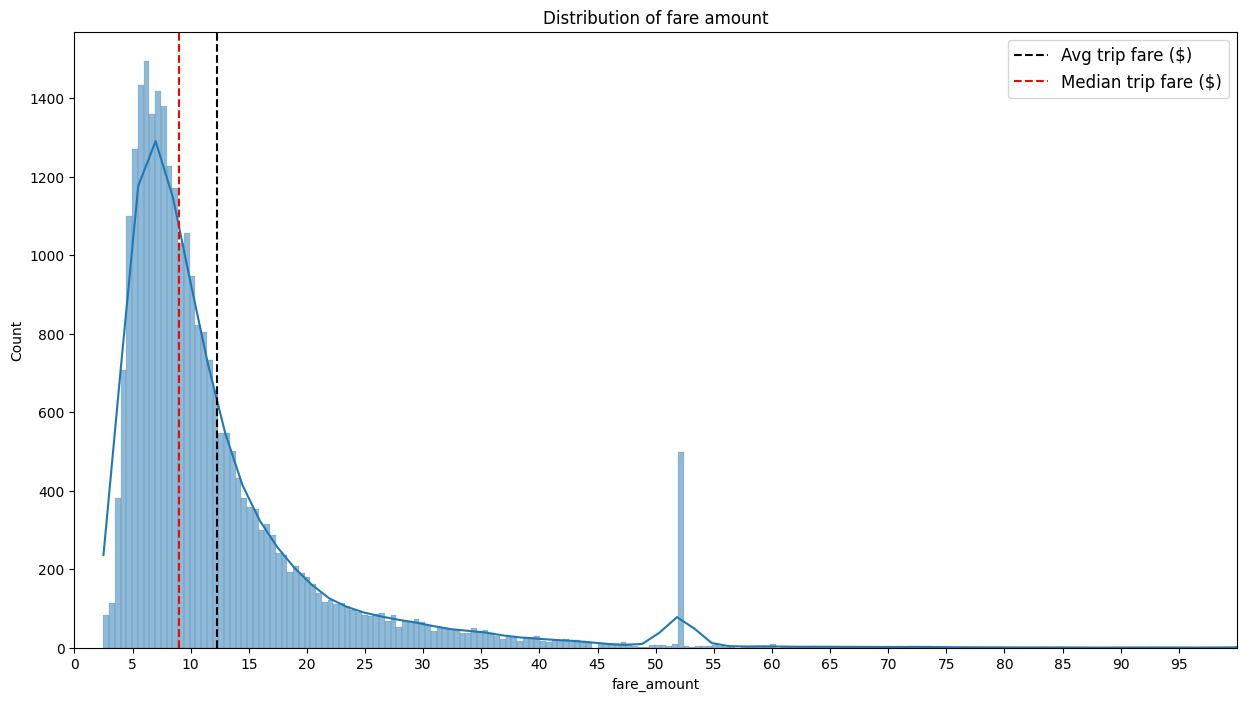

In [ ]:
sns.histplot(data=df,x="fare_amount",kde=True)

plt.axvline(df["fare_amount"].mean(),color = "k",
            linestyle = "dashed",label = "Avg trip fare ($)")
plt.axvline(df["fare_amount"].median(),color = "r",
            linestyle = "dashed",label = "Median trip fare ($)")

plt.title("Distribution of fare amount")
plt.xticks(np.arange(0, 100, step=5))
plt.legend(loc = "best",prop = {"size" : 12})
plt.gcf().set_size_inches(15,8)
plt.xlim(0,100)

<font size=4> Observations <font>
- We can observe a right skewed distribution and determine that most of the taxi fares range from **2.50\\$  to 20\\$**.
- This distribution also resembles the power law distribution, which is very common in real world.
- We can observe some peaks between **50\\$-55\\$**, which again are only few cases, hence they might affect the ML models learning. Therefore we can consider them as outliers and discard them, as they are only few in number.


### Step 2: Plotting distribution of Distance travelled

(0.0, 30.0)

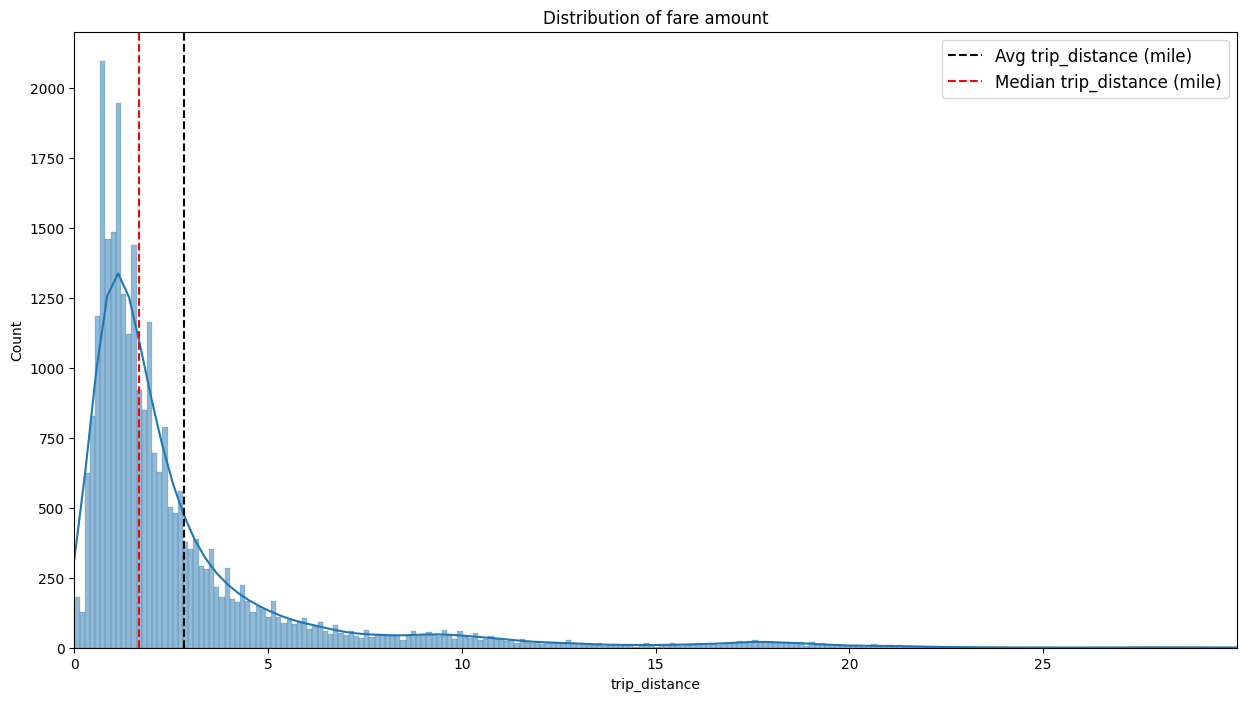

In [ ]:
sns.histplot(data=df,x="trip_distance",kde=True)

plt.axvline(df["trip_distance"].mean(),color = "k",
            linestyle = "dashed",label = "Avg trip_distance (mile)")
plt.axvline(df["trip_distance"].median(),color = "r",
            linestyle = "dashed",label = "Median trip_distance (mile)")

plt.title("Distribution of fare amount")
plt.xticks(np.arange(0, 30, step=5))
plt.legend(loc = "best",prop = {"size" : 12})
plt.gcf().set_size_inches(15,8)
plt.xlim(0,30)

<font size=4> Observations <font>    
- We can observe that most of the passengers travel on average **3-5 km**.
- This distribution looks very similar to the distribution of the fare amount. Hence we can assume that both fare amount and distance have overlapping distributions.

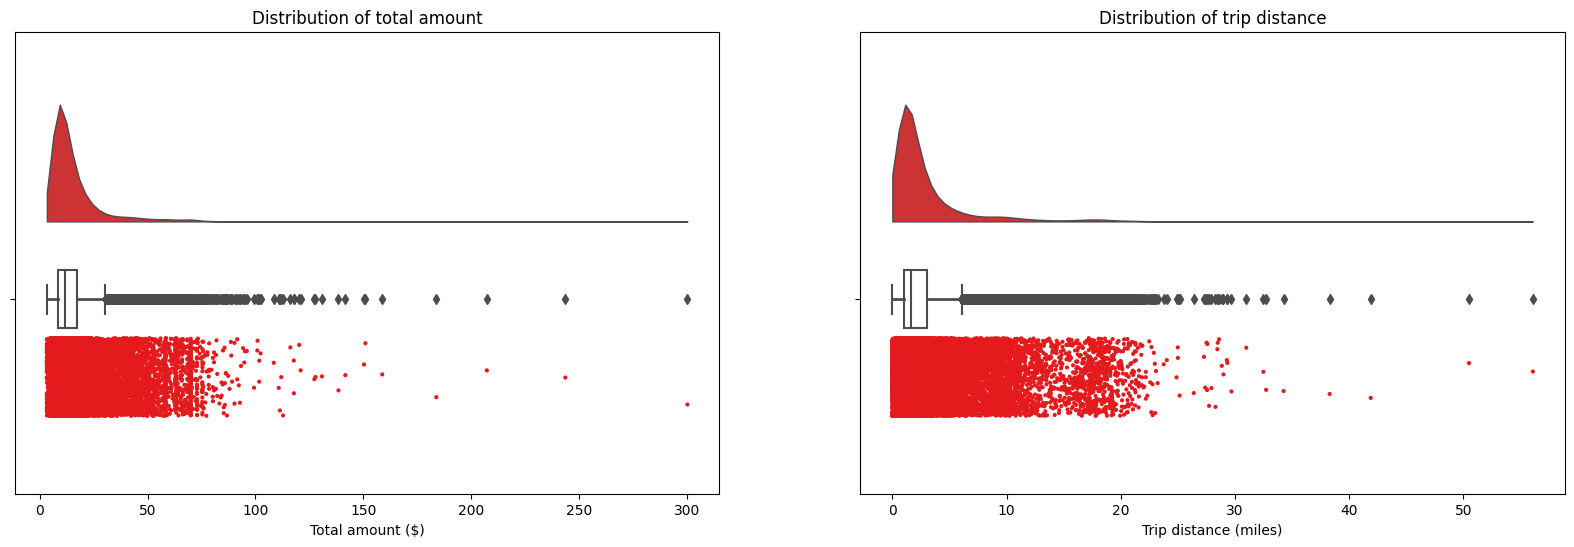

In [ ]:
ort = "h"; pal = "Set1"; sigma = .2

# plot the categorical variables
plt.figure(figsize=(20, 6))

ax = plt.subplot(1,2,1)
ax1=pt.RainCloud(y = "total_amount", data = df, palette = pal, bw = sigma,
                 width_viol = .6, ax = ax, orient = ort, move = .2)
plt.title("Distribution of total amount")
ax1.set(xlabel = 'Total amount ($)')

ax2 = plt.subplot(1,2,2)
ax2=pt.RainCloud(y = "trip_distance", data = df, palette = pal, bw = sigma,
                 width_viol = .6, ax = ax2, orient = ort, move = .2)
plt.title("Distribution of trip distance")
ax2.set(xlabel = 'Trip distance (miles)')
plt.show()

Observations:
- The raincloud plot above shows the distribution of the `total amount` and the `trip distances`.
- Both have a similar distribution (right skewed). Since the amount paid depends on the distance, this actually makes sense.
- There are a few outliers

### Step 3: Frequency of Passenger in rides

#### Does the number of passengers affect the fare?

Text(0, 0.5, 'Frequency')

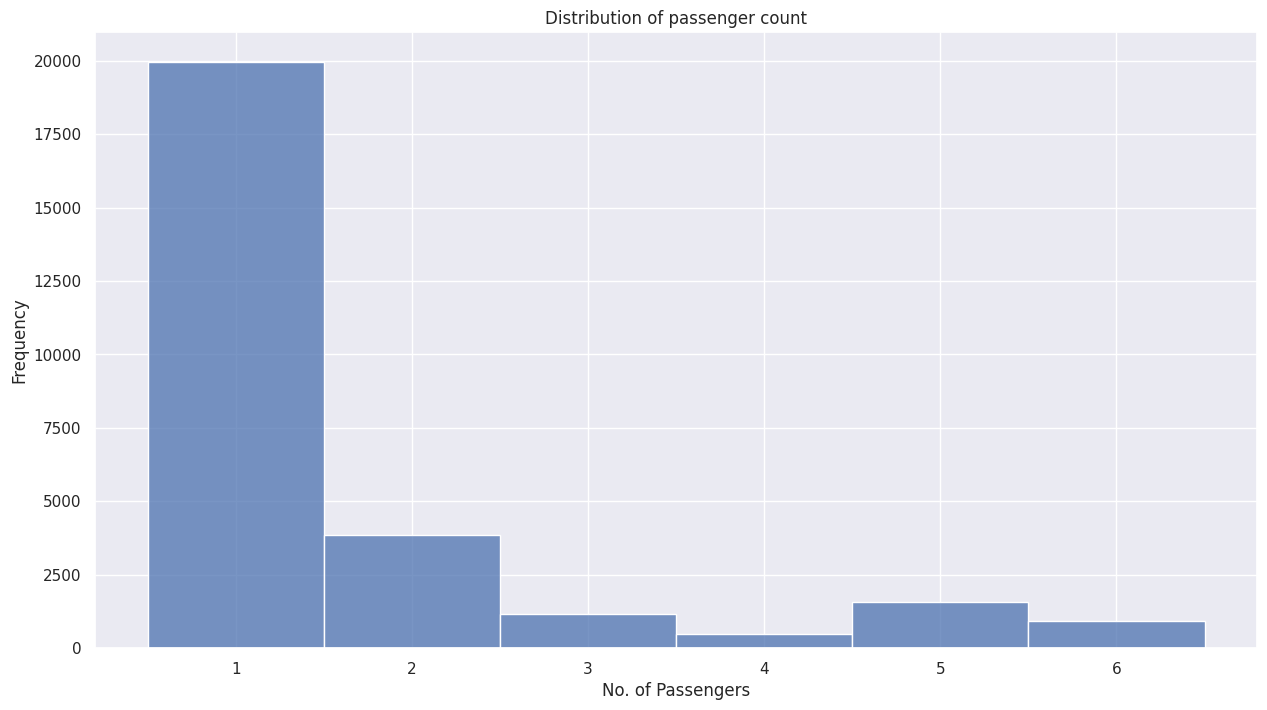

In [ ]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.histplot(data=df, x="passenger_count", stat="count", discrete=True)
plt.title("Distribution of passenger count")
plt.xlabel('No. of Passengers')
plt.ylabel('Frequency')

- The number of rides with only **1** passenger is the highest compared to more than 1 passenger rides.

### Step 4: Fare vs. Passenger Count

Text(0, 0.5, 'Fare')

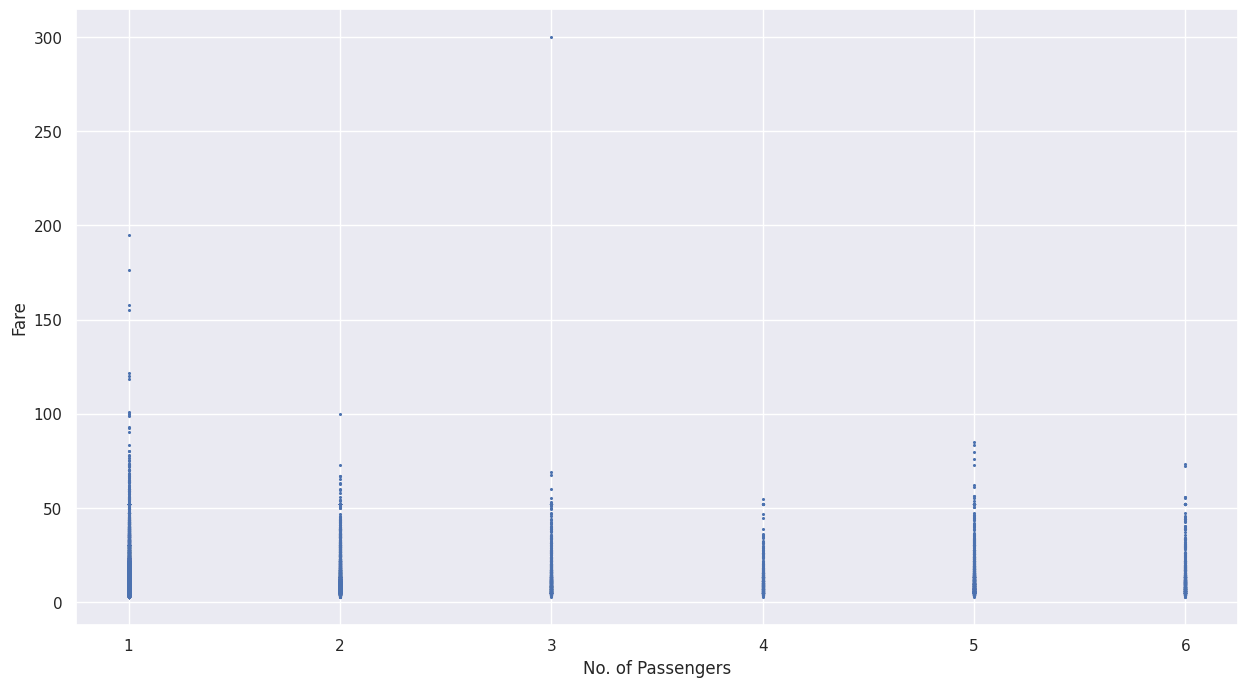

In [ ]:
plt.figure(figsize=(15,8))
plt.scatter(x=df['passenger_count'], y=df['fare_amount'], s=1.5)
plt.xlabel('No. of Passengers')
plt.ylabel('Fare')

- The fare in 1 passenger rides is higher compared to more than 1 passenger ride. This occurs due to the share of total fare amount.

### Step 5: Number of Rides vs. Hour of day

#### Does the pick-up date and time affect the fare?

Text(0, 0.5, 'Frequency')

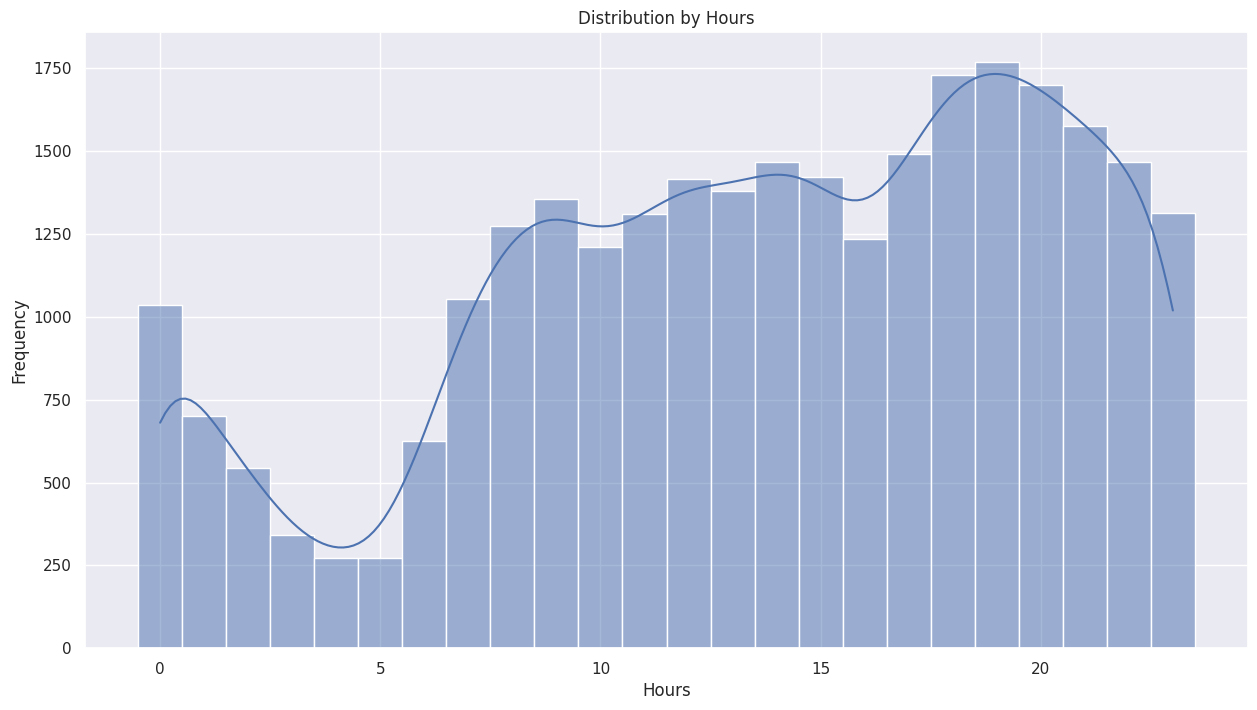

In [ ]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.histplot(data=df, x="hour", stat="count", discrete=True, kde=True)
plt.title("Distribution by Hours")
plt.xlabel('Hours')
plt.ylabel('Frequency')

- Taxi fares are rare at **4 am and 5am** and reaches the maximum at **7pm**
- The number of rides at **4 am and 5 am** in the morning are the least. The number of rides remains constant for the remaining hours of the day. This signifies the rush hour timings when people are going to and returning from work.

### Step 6: Fare vs. Hour of day

Text(0, 0.5, 'Fare')

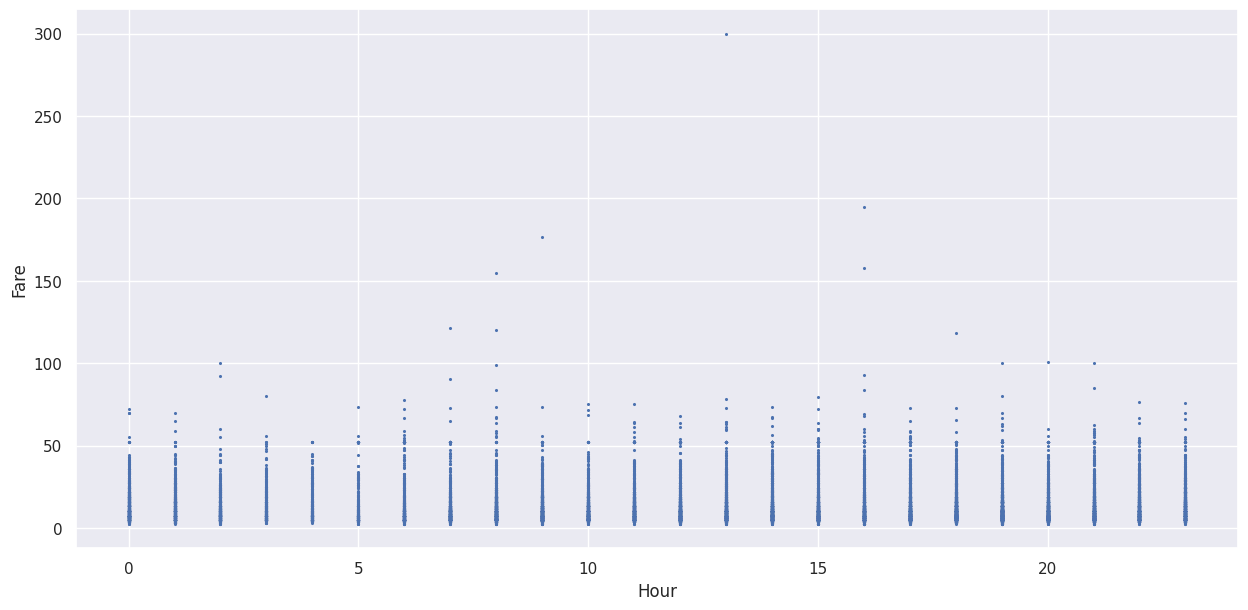

In [ ]:
plt.figure(figsize=(15,7))
plt.scatter(x=df['hour'], y=df['fare_amount'], s=1.5)
plt.xlabel('Hour')
plt.ylabel('Fare')

- We can observe that the `fare amount` for different hours of the day remains **uniform**, hence we don’t fetch any meaningful insight.

Text(0, 0.5, 'Fare')

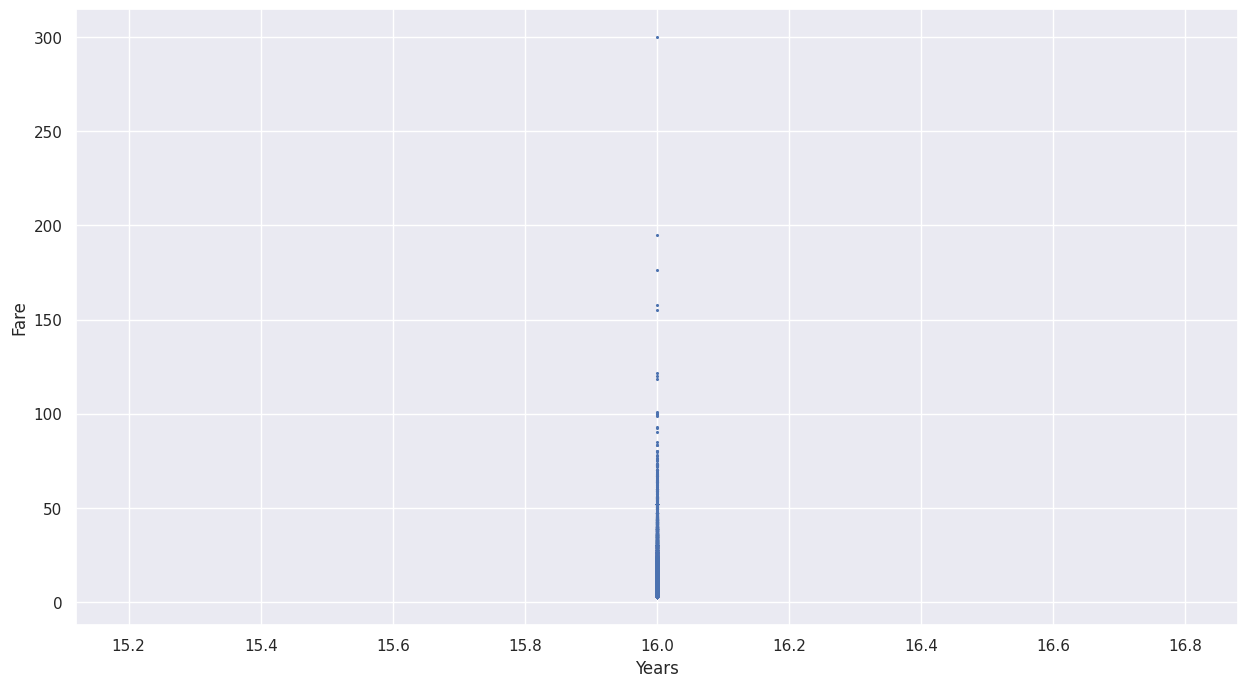

In [ ]:
plt.figure(figsize=(15,8))
plt.scatter(x=df['year'], y=df['fare_amount'], s=1.5)
plt.xlabel('Years')
plt.ylabel('Fare')

- The rate does not change significantly over the years

Text(0, 0.5, 'Fare')

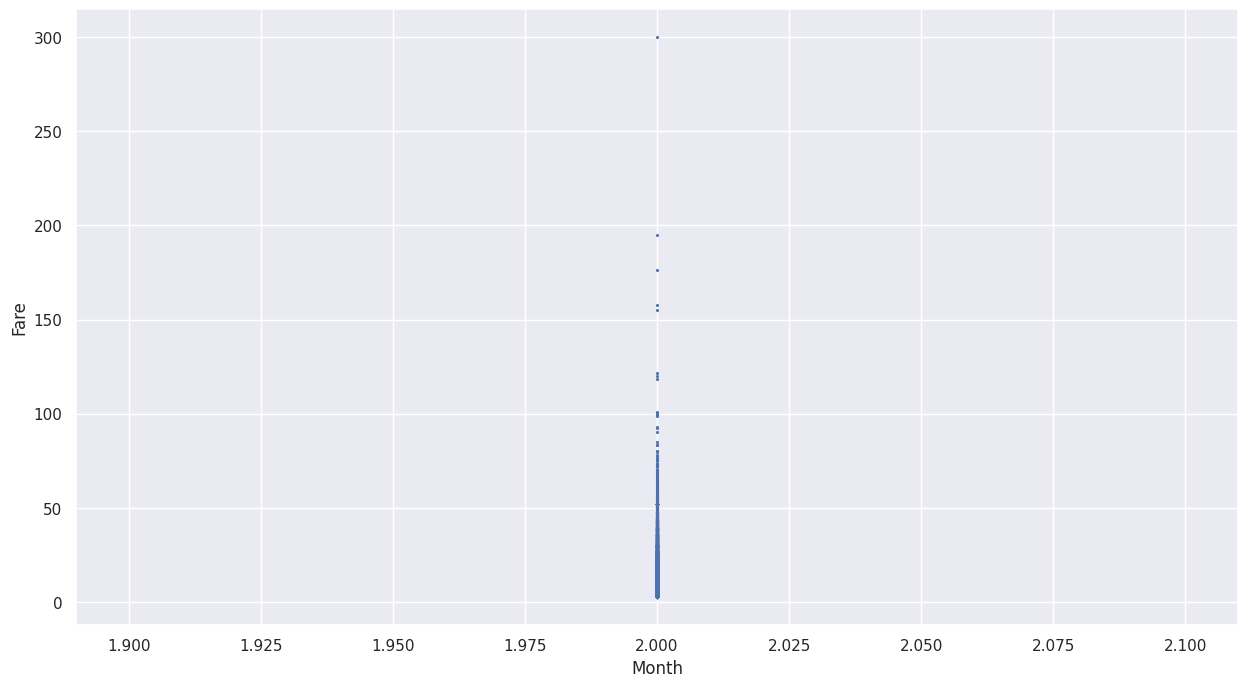

In [ ]:
plt.figure(figsize=(15,8))
plt.scatter(x=df['month'], y=df['fare_amount'], s=1.5)
plt.xlabel('Month')
plt.ylabel('Fare')

- The rate is **uniform** throughout the months

### Step 7: Fare vs. Day, Week and Month

In [ ]:
def time_slicer(df, timeframes, value, color="purple"):
    """
    Function to count observation occurrence through different lenses of time.
    """
    f, ax = plt.subplots(len(timeframes), figsize = [12,12])
    for i,x in enumerate(timeframes):
        df.loc[:,[x,value]].groupby([x]).mean().plot(ax=ax[i],color=color)
        ax[i].set_ylabel(value.replace("_", " ").title())
        ax[i].set_title("{} by {}".format(value.replace("_", " ").title(), x.replace("_", " ").title()))
        ax[i].set_xlabel("")
    plt.tight_layout(pad=0)

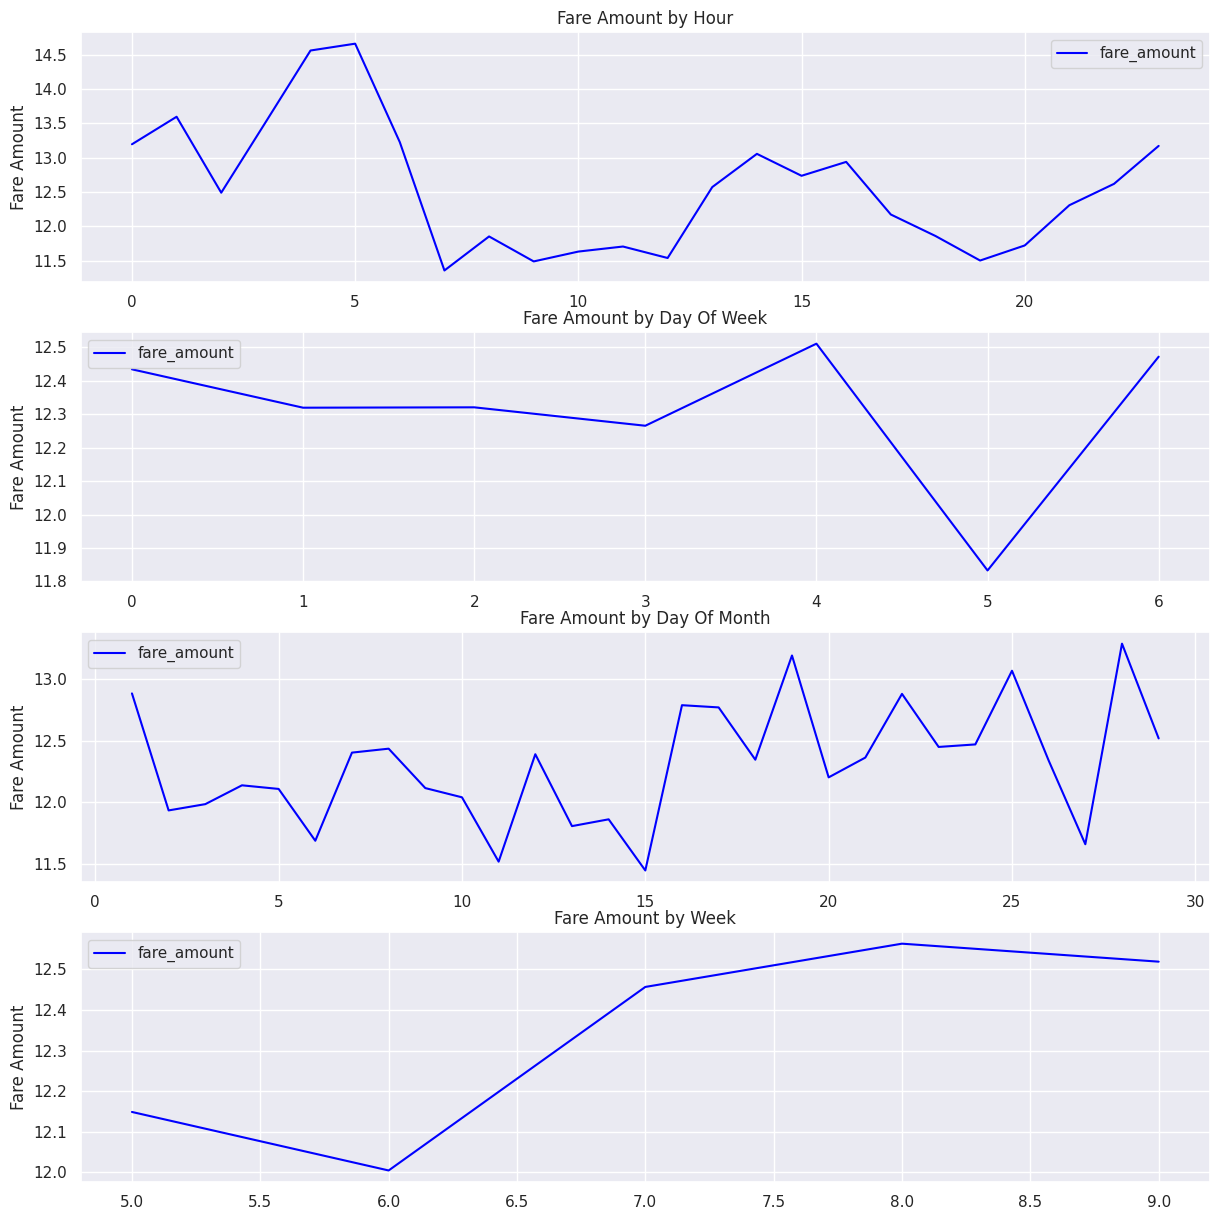

In [ ]:
time_slicer(df=df, timeframes=['hour', 'day_of_week','day_of_month', 'week', ], value = "fare_amount", color="blue")

- We can observe that average fare peaks at **Sunday(6), Wednesday(2), Thursday(3)**
- We can also observe that the fare amount is the highest between the `3rd` and `4th` week of the month.
- The higher the demand, the lower the fee and vice versa
- The average fee has been increasing over the years

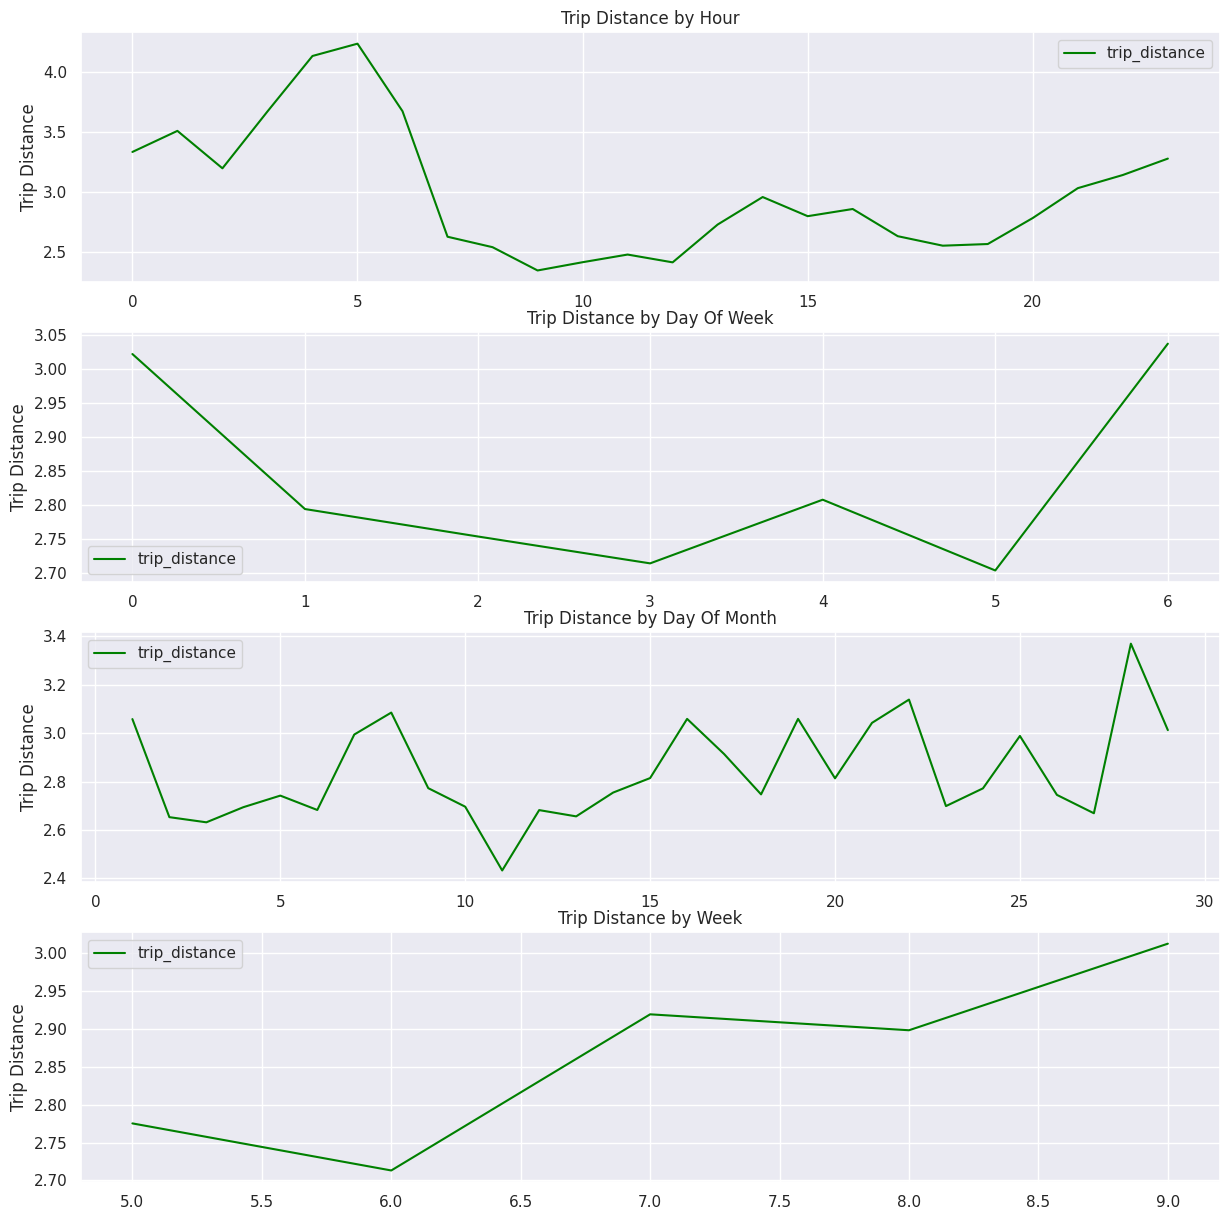

In [ ]:
time_slicer(df=df, timeframes=['hour', 'day_of_week','day_of_month', 'week'], value = "trip_distance", color="green")


In [ ]:
df[['fare_amount','trip_distance']].corr()

,fare_amount,trip_distance
fare_amount,1.000000,0.934721
trip_distance,0.934721,1.000000


- The correlation number between these two values is high, as a result the graphs are very similar to each other
- At 5 o'clock in the morning, some people who have a long distance to travel leave home early, but they are not many, so the fare increases.

### Step 8: Hours and Demand

#### Normal Working Days

<AxesSubplot: title={'center': 'Number of Taxi Trips During Normal Working Days'}, xlabel='hour', ylabel='count'>

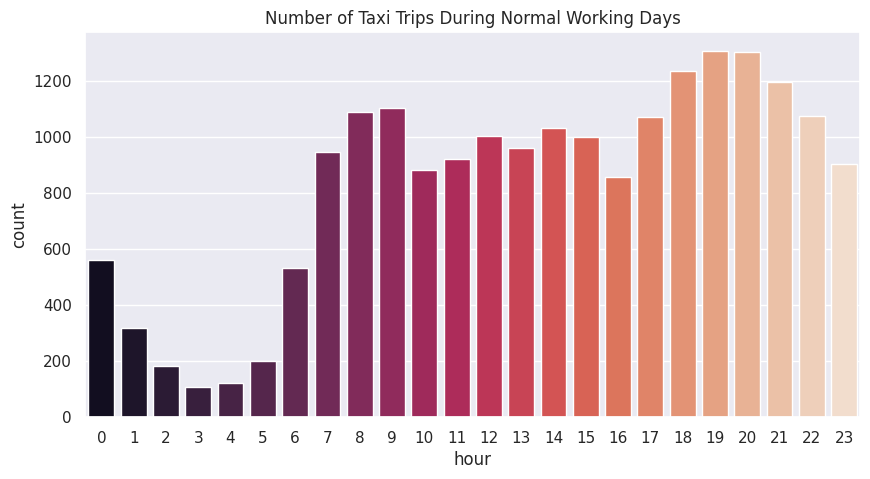

In [ ]:
plt.figure(figsize=(10,5))
plt.title('Number of Taxi Trips During Normal Working Days')
sns.set_style("white")
sns.countplot(x='hour', data=df.loc[(df.day_of_week >= 0) & (df.day_of_week <= 4)],palette='rocket')

In [ ]:
df.loc[(df.day_of_week >=0) & (df.day_of_week <=4)].shape

(19888, 32)

As one can see above, there are some periods of the day that we should pay attention to. In the morning, from **7am to 9am** we can notice an increase in the number of taxi trips. This might be related to the time where people are getting to work. From **16pm to 20pm** we have an increase on the demand. These rush hours should be taken into consideration in the feature engineering process.

#### Weekends

<AxesSubplot: title={'center': 'Number of Taxi Trips During Weekends'}, xlabel='hour', ylabel='count'>

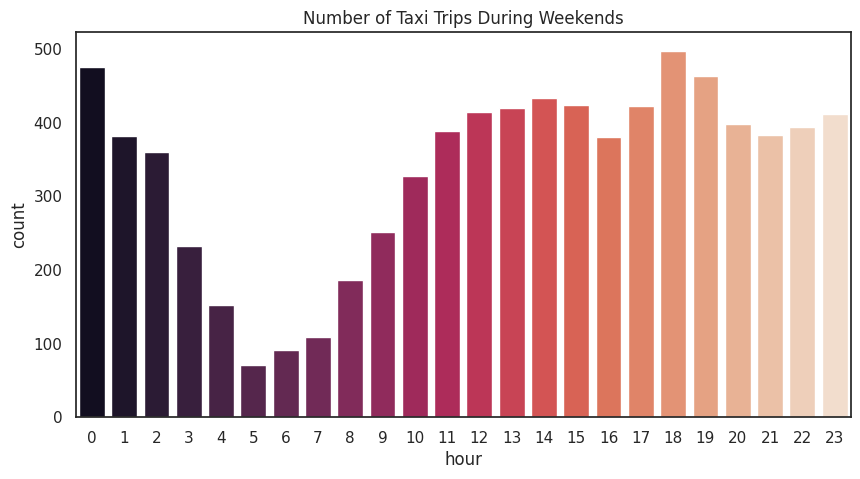

In [ ]:
plt.figure(figsize=(10,5))
plt.title('Number of Taxi Trips During Weekends')
sns.set_style("white")
sns.countplot(x='hour', data=df.loc[(df.day_of_week >= 5) & (df.day_of_week <= 6)],palette='rocket')

In [ ]:
df.loc[(df.day_of_week >= 5) & (df.day_of_week <= 6)].shape

(8074, 32)

On the weekends, the results are a bit different. We have a great part of the trips ocurring from **0am** to **2am**. These might be related to airport trips, or people taking taxis to/from pubs. From **16pm** to **19pm** we have an increase on the demand

#### Hours and Mean Fare Amount - Working Weekdays vs Weekends

In [ ]:
day_of_week = df.loc[(df.day_of_week >= 0) & (df.day_of_week <= 5)]
day_of_week =  df.loc[(df.day_of_week >= 6) & (df.day_of_week <= 7)]
day_of_week_fare = day_of_week.groupby(['hour']).fare_amount.mean().to_frame().reset_index()
day_of_week_fare = day_of_week.groupby(['hour']).fare_amount.mean().to_frame().reset_index()

In [ ]:
np.array(day_of_week_fare.hour)
np.array(day_of_week_fare.fare_amount)

array([12.84728033, 13.19605911, 12.24120603, 12.66269841, 12.47608696,
       10.21666667, 16.32926829, 16.47674419,  9.06024096,  9.76315789,
       11.15506329, 10.66857143, 11.69154229, 13.96153846, 13.39140271,
       12.29656863, 14.51724138, 13.27807487, 11.98913043, 12.45707071,
       11.6097561 , 12.5239521 , 12.63235294, 12.83214286])

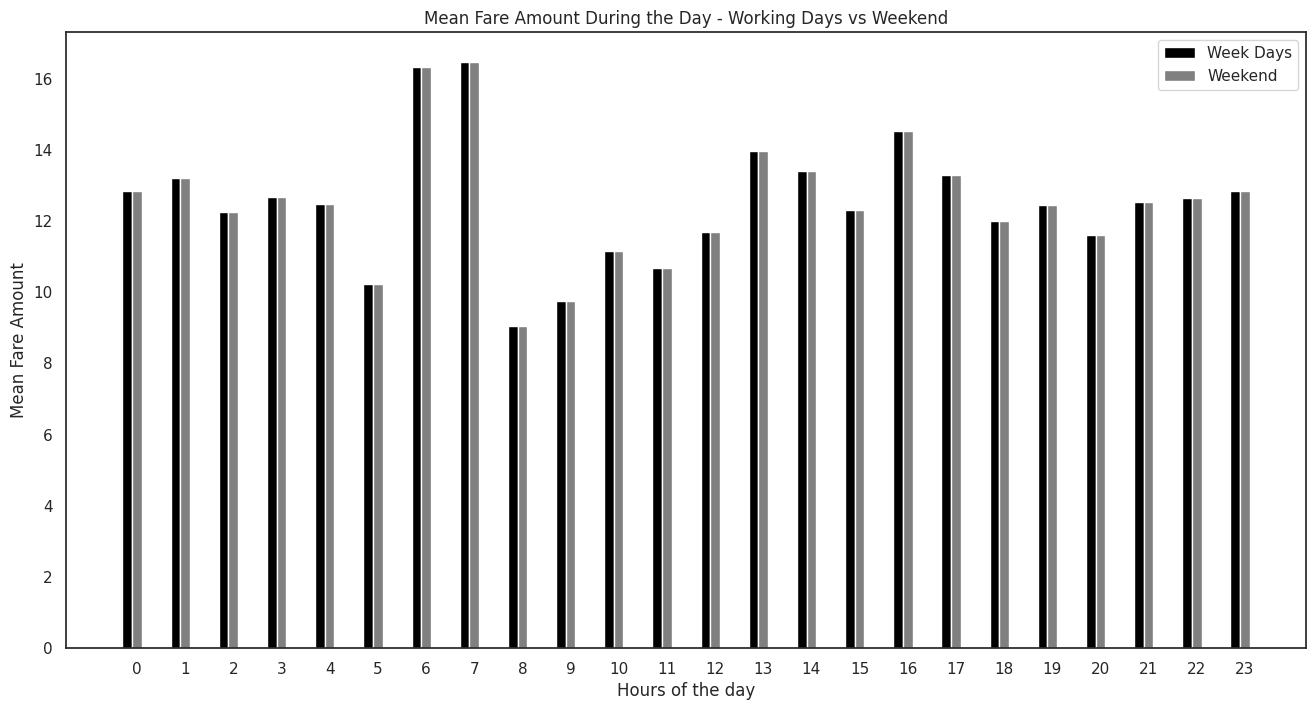

In [ ]:
x = np.array(day_of_week_fare.hour)
y = np.array(day_of_week_fare.fare_amount)
z = np.array(day_of_week_fare.fare_amount)


plt.figure(figsize=(16,8))
plt.title('Mean Fare Amount During the Day - Working Days vs Weekend')
plt.xlabel('Hours of the day')
plt.ylabel('Mean Fare Amount')
ax = plt.subplot(111)
ax.bar(x-0.2, y, width=0.2, color='black', align='center',label = 'Week Days')
ax.bar(x, z, width=0.2, color='gray', align='center', label = 'Weekend')
plt.xticks(range(0,24))
plt.legend()
plt.show()

On normal working days, from monday to friday, it can be seen that overnight there is an increase in the mean fare amount, from **20pm** to aproximately **6am**. This can be related to some tax applied due to the hours, and should be investigated in feature engineering.

### Step 9: Correlation Matrix  (Pearson’s Correlation)

We will now see the pairwise correlation between the numerical variables. Since the correlation matrix will be symmetric, we will only visualize the lower triangular matrix.

In [ ]:
# select numerical columns
numerical_cols = df.select_dtypes(include=['float', "int"]).columns
# compute the pairwise correlations
df_corr = df[numerical_cols].corr().round(2)

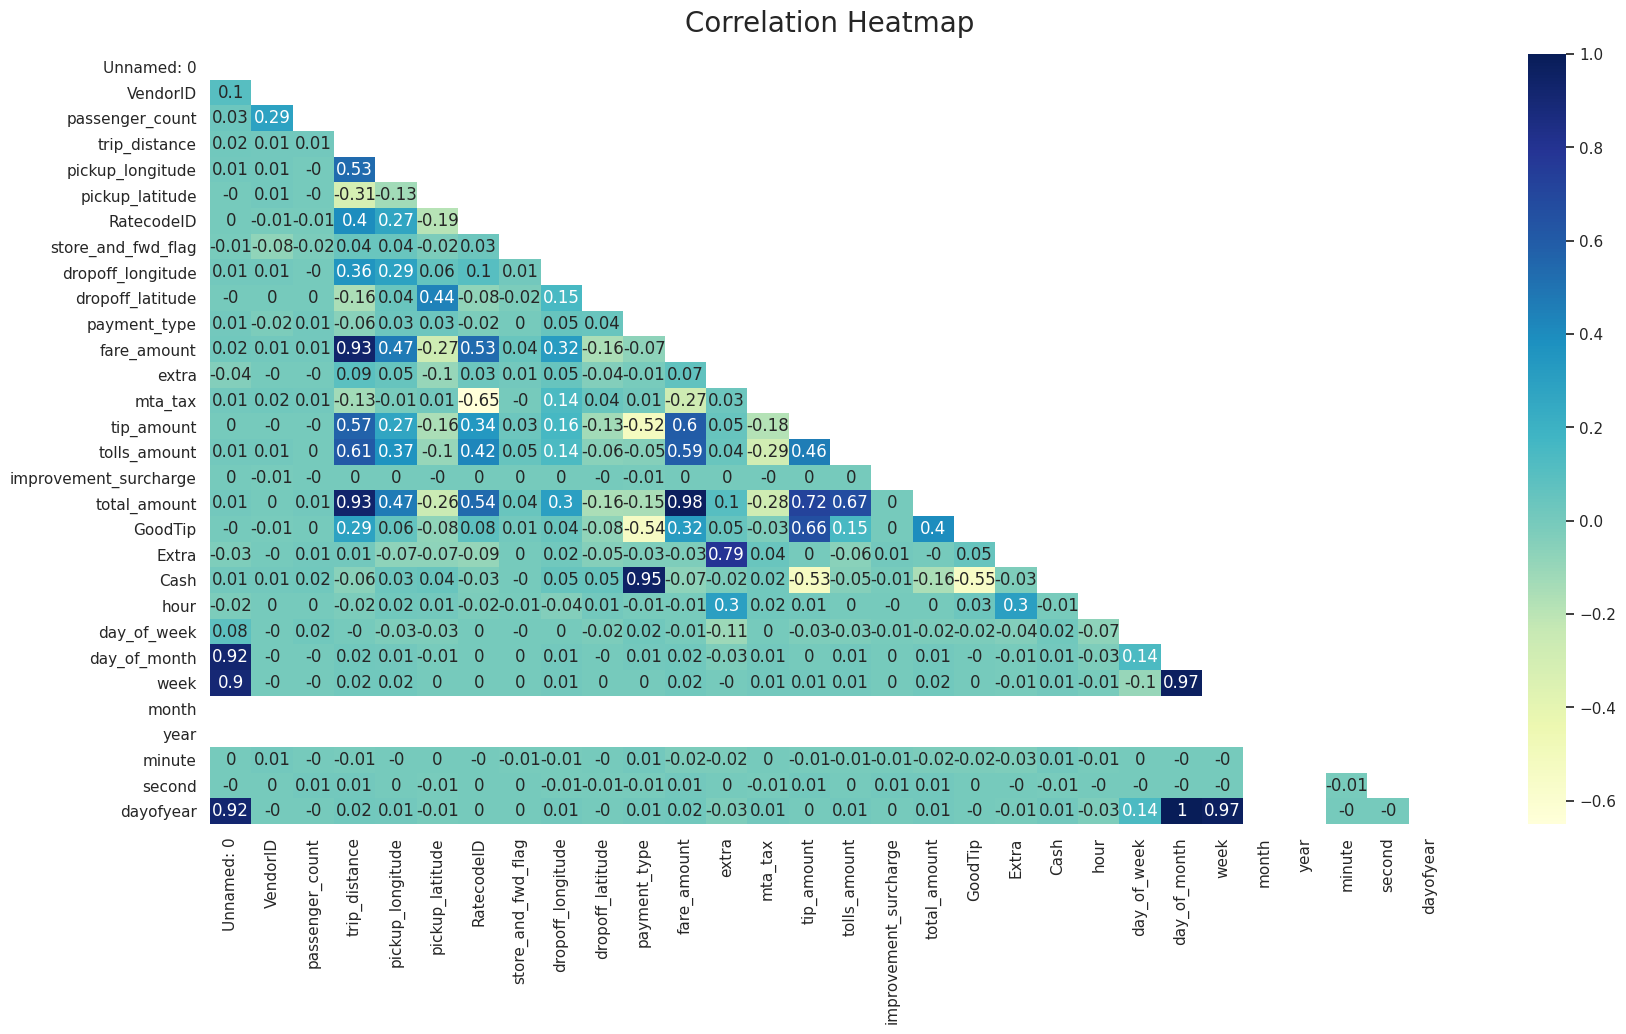

In [ ]:
mask = np.triu(np.ones_like(df_corr, dtype=bool))
#Correlation using heatmap
plt.figure(figsize = (20, 10))
heatmap = sns.heatmap(df_corr, mask=mask, annot=True, cmap="YlGnBu")
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':20}, pad=16);
plt.show()

This is the correlation matrix with the range from +1 to -1 where +1 is highly and positively correlated and -1 will be highly negatively correlated.
- passenger count is not correlated with anything
- We can observe that our target variable **fare_amount** has high positive correlation with features like **trip_distance, Rate_Code_ID, Tip_amount, Toll_amount, total_amount**
- We can also observe high negative correlation with **mta_tax**
- We conclude that the feature `fare_amount` and `total_amount` are almost the same as they have very high Person’s Correlation. We can remove similar redundant features from the dataset.

### Step 10: Bivariate analysis - Fare vs Distance

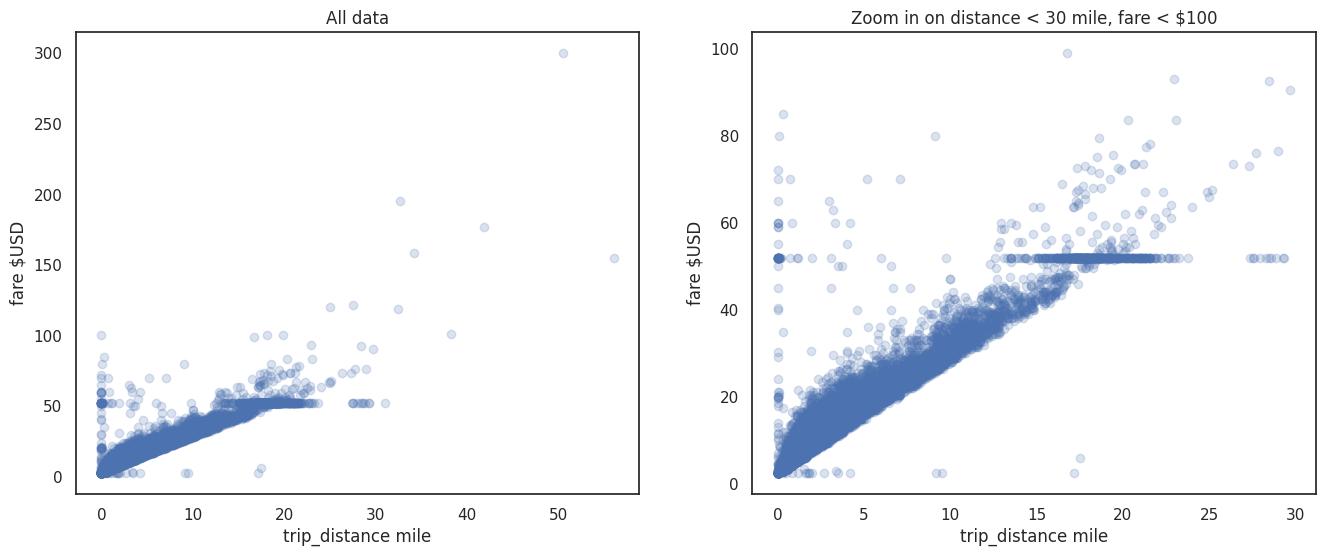

In [ ]:
# scatter plot distance - fare
fig, axs = plt.subplots(1, 2, figsize=(16,6))
axs[0].scatter(df.trip_distance, df.fare_amount, alpha=0.2)
axs[0].set_xlabel('trip_distance mile')
axs[0].set_ylabel('fare $USD')
axs[0].set_title('All data')

# zoom in on part of data
idx = (df.trip_distance < 30) & (df.fare_amount < 100)
axs[1].scatter(df[idx].trip_distance, df[idx].fare_amount, alpha=0.2)
axs[1].set_xlabel('trip_distance mile')
axs[1].set_ylabel('fare $USD')
axs[1].set_title('Zoom in on distance < 30 mile, fare < $100');

- We can observe a linear relationship between the fare amount and the total distance travelled. The distance feature is going to be very helpful for ML models like Linear Regression as we can clearly visualize the line which can intersect all the points when these two dimensions are chosen.

### Step 11: Plotting the pickup and drop off locations on Map

In [ ]:
import folium


long_trips=df[df['trip_distance']>=10]

drop_map = folium.Map(location = [40.730610,-73.935242],zoom_start = 12)

### For each pickup point add a circlemarker

for index, row in long_trips.iterrows():

    folium.CircleMarker([row['dropoff_latitude'], row['dropoff_longitude']],
                        radius=3,
                        color="green",
                        fill_opacity=0.9
                       ).add_to(drop_map)
for index, row in long_trips.iterrows():

    folium.CircleMarker([row['pickup_latitude'], row['pickup_longitude']],
                        radius=3,
                        color="blue",
                        fill_opacity=0.9
                       ).add_to(drop_map)
drop_map

- We can observe that, the `drop-off` and `pickup` locations are condensed near the city year- Manhattan. This intuitively makes sense as all the offices are located near the city, hence there is a heavy demand of ride hailing services in that area
- Also, the drop off locations are in the outskirts of the city, as it is the residential area, where people live.
- This information can be used to direct the drivers to the high demand area, which would fetch them more rides without a lot of waiting time. As the demand is high, the fare price increases to match the demand, and this will continue until the demand normalizes.

#### Feature selection

In [ ]:
print(df.dtypes)

Unnamed: 0                        int64
VendorID                          int64
tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime    datetime64[ns]
passenger_count                   int64
trip_distance                   float64
pickup_longitude                float64
pickup_latitude                 float64
RatecodeID                        int64
store_and_fwd_flag                int64
dropoff_longitude               float64
dropoff_latitude                float64
payment_type                      int64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
total_amount                    float64
GoodTip                           int64
Extra                             int64
Cash                              int64
hour                              int64
day_of_week                       int64


**pickup_datetime** and **dropoff_datetime** columns as datetime columns and **loc1 and loc2** columns as object columns. We cannot be directly used while modeling. Features need to be extracted from the timestamp fields which will later be used as features for modeling.

In [ ]:
df.drop([ 'tpep_pickup_datetime','tpep_dropoff_datetime'], axis=1, inplace=True)


In [ ]:
df.columns

Index(['Unnamed: 0', 'VendorID', 'passenger_count', 'trip_distance',
       'pickup_longitude', 'pickup_latitude', 'RatecodeID',
       'store_and_fwd_flag', 'dropoff_longitude', 'dropoff_latitude',
       'payment_type', 'fare_amount', 'extra', 'mta_tax', 'tip_amount',
       'tolls_amount', 'improvement_surcharge', 'total_amount', 'GoodTip',
       'Extra', 'Cash', 'hour', 'day_of_week', 'day_of_month', 'week', 'month',
       'year', 'minute', 'second', 'dayofyear'],
      dtype='object')

### Drop the target variables.
when two or more explanatory variables are highly correlated with each other, such that they do not provide unique or independent information in the regression model. If the degree of correlation is high enough between variables, it can cause problems when fitting and interpreting the regression model.

In [ ]:
df=df.drop(['extra','mta_tax','tip_amount','improvement_surcharge','total_amount','GoodTip', 'Extra', 'Cash'],axis=1)
df.shape

(27962, 22)

#### Remove uncorrelated features with the target

Looking back at the results of correlation plot. We can also safely remove the features which have zero correlation with our target variable. These are **Unnamed: 0,  VendorID,  passenger_count,  hour,  day_of_week,  day_of_month,  week,  minute, second,  dayofyear  and  improvement_surcharge.**

In [ ]:
df.drop(['Unnamed: 0', 'VendorID', 'passenger_count', 'store_and_fwd_flag', 'hour', 'day_of_week', 'day_of_month','week', 'minute', 'second','dayofyear'], axis=1, inplace=True)
df.shape

(27962, 11)

In [ ]:
df.columns

Index(['trip_distance', 'pickup_longitude', 'pickup_latitude', 'RatecodeID',
       'dropoff_longitude', 'dropoff_latitude', 'payment_type', 'fare_amount',
       'tolls_amount', 'month', 'year'],
      dtype='object')

We are now left with **11** features. We can proceed to modelling.

# Modelling <a id ="data-analysis-and-modelling"></a>
Now that we have a more or less cleaned data. We proceed to model building. But before building a Machine learning model, we will create a simple rule based baseline model and whatever we do after that needs to beat the baseline.

We will start by splitting the data into training and test sets. Based on the training data, a subset of the features will be selected for modeling. Then, a **baseline model** will be developed and evaluated. Afterwards, since the problem at hand seems to be relatively very simple. We will create **Decision Tree** classifier. Using Decision trees has also a biggest advantage that they deliver an intuitive explanations for what the model has learned. Of course, Decision trees tend to overfit the training data. We need to be careful. Otherwise, we will also create a  **Extra Gradient Boosting Tree (Boosting Model)** and see if the added complexity would provide additional gain in performance.


### Step 1: Train-Test Split
- We are splitting the data into two parts – Train and Test
- The split ratio is **80% train data** and **20 % test data**. This is because the dataset is inherently showing the behavior of being clean. Therefore, we can test the ML models on a smaller sample size. This splits ratio also gives us the opportunity to deal with larger cross-validation data.

In [ ]:
X = df.drop(['fare_amount'], axis=1)
y = df['fare_amount']

X_train, X_test, y_train, y_test  = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=123, shuffle=True)
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")

X_train shape: (22369, 10)
X_test shape: (5593, 10)


### Model 1: Linear Regression – Baseline Model

The simplest model sometimes yields the best results. That is the case of Linear Regression, when the relation between each feature and the target variable is based on a single coefficient. However, data are often correlated in a more complex way. The exploration of our dataset did not reveal any clear linear relation between variables. Therefore, we do not expect great results from this model. We can however use it as a baseline to judge the performance of other more complex predictors.[[13]](https://medium.com/analytics-vidhya/linear-regression-decision-tree-and-ensemble-learning-applied-to-seoul-housing-prices-830d3493cfdb)

In [ ]:
def Linear_reg(X_train, X_test, y_train, y_test):
    linear = LinearRegression()
    linear.fit(X_train, y_train)

    y_train_predict = linear.predict(X_train)
    r2_train = r2_score(y_train, y_train_predict)
    RMSE_train = mean_squared_error(y_train, y_train_predict, squared=False)

    y_test_predict = linear.predict(X_test)
    r2_test = r2_score(y_test, y_test_predict)
    RMSE_test = mean_squared_error(y_test, y_test_predict, squared=False)

    return r2_train, r2_test, linear,RMSE_train,RMSE_test

r2_train, r2_test, linear,RMSE_train,RMSE_test = Linear_reg(X_train, X_test, y_train, y_test)

print("R^2 (train) : ", r2_train)
print("RMSE (train): ", RMSE_train)
print("R^2 (test) : ", r2_test)
print("RMSE (test): ", RMSE_test)

R^2 (train) :  0.9062717825844807
RMSE (train):  3.0938358394565766
R^2 (test) :  0.9015549105502095
RMSE (test):  3.365927299438079


- We can observe that the root mean square error for both train and test datasets is 3.09 and 3.36 respectively
- R-Squared value of both **0.9** train and test datasets indicate that **90%** of the variance of the dependent variable being studied is explained by the variance of the independent variable
- Also, there isn’t a significant difference deviation between the RMSE of train and test dataset, therefore we conclude there isn’t an **overfitting** problem.

### Model 2: Decision Tree Regressor(Tree based Model)

A Decision Tree is capable of modeling complex nonlinear relationships in the data, both for classification and regression tasks. Features located at the higher levels of the tree have a larger impact on the prediction, which makes the model easily interpretable. Decision Trees are known to be prone to overfitting. [[13]](https://medium.com/analytics-vidhya/linear-regression-decision-tree-and-ensemble-learning-applied-to-seoul-housing-prices-830d3493cfdb)

In [ ]:
dtr = DecisionTreeRegressor().fit(X_train, y_train)
y_test_pred = dtr.predict(X_test)

#Root Mean Square Error
rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
print("RMSE: %f" % (rmse))

# Mean Squared Error
print("Mean squared error: %.2f"
% mean_squared_error(y_test, y_test_pred))

#  R2 Score
print('Variance score: %.2f' % r2_score(y_test, y_test_pred))

RMSE: 3.520375
Mean squared error: 12.39
Variance score: 0.89


- We can observe that the root mean square error for decision tree model is **3.78**, which is more than the RMSE of Linear Regression.

### Model 3: Extra Gradient Boosting Tree (Boosting Model)

XGBoost is an advanced implementation of the Gradient Boosting algorithm, with regularization techniques to further reduce overfitting and parallel processing for faster computation.[[13]](https://medium.com/analytics-vidhya/linear-regression-decision-tree-and-ensemble-learning-applied-to-seoul-housing-prices-830d3493cfdb)

In [ ]:
params = {

    'max_depth': 7,
    'gamma' :0,
    'eta':.03,
    'subsample': 1,
    'colsample_bytree': 0.9,
    'objective':'reg:linear',
    'eval_metric':'rmse',
    'silent': 0,
    'verbosity' : 0,
    'random_state' : 42
}

In [ ]:
def XGBmodel(X_train,X_test,y_train,y_test,params):
    matrix_train = xgb.DMatrix(X_train,label=y_train)
    matrix_test = xgb.DMatrix(X_test,label=y_test)
    model=xgb.train(params=params,
                    dtrain=matrix_train,num_boost_round=500,
                    early_stopping_rounds=10,evals=[(matrix_test,'test')])
    return model

model = XGBmodel(X_train,X_test,y_train,y_test,params)

[0]	test-rmse:15.54060
[1]	test-rmse:15.11267
[2]	test-rmse:14.69768
[3]	test-rmse:14.29647
[4]	test-rmse:13.90830
[5]	test-rmse:13.52596
[6]	test-rmse:13.15492
[7]	test-rmse:12.79718
[8]	test-rmse:12.44949
[9]	test-rmse:12.11265
[10]	test-rmse:11.78566
[11]	test-rmse:11.46994
[12]	test-rmse:11.16425
[13]	test-rmse:10.86942
[14]	test-rmse:10.61328
[15]	test-rmse:10.33574
[16]	test-rmse:10.06763
[17]	test-rmse:9.80775
[18]	test-rmse:9.55592
[19]	test-rmse:9.31146
[20]	test-rmse:9.07563
[21]	test-rmse:8.87609
[22]	test-rmse:8.65414
[23]	test-rmse:8.44034
[24]	test-rmse:8.23272
[25]	test-rmse:8.04337
[26]	test-rmse:7.84892
[27]	test-rmse:7.66147
[28]	test-rmse:7.47993
[29]	test-rmse:7.30337
[30]	test-rmse:7.13354
[31]	test-rmse:6.96825
[32]	test-rmse:6.80971
[33]	test-rmse:6.65508
[34]	test-rmse:6.51939
[35]	test-rmse:6.37627
[36]	test-rmse:6.23862
[37]	test-rmse:6.10628
[38]	test-rmse:5.97822
[39]	test-rmse:5.85598
[40]	test-rmse:5.73787
[41]	test-rmse:5.62243
[42]	test-rmse:5.53366
[43]

- We can observe that the final **RMSE** for XGboost model is **3.03** at the **322th** iteration. This model is significantly performing better than `Decision Tree` and `Linear Regression`.

### Feature Importance - XGBoost

In [ ]:
y = model.predict(xgb.DMatrix(X_test), ntree_limit = model.best_ntree_limit).tolist()

/home/habta/Andi/lib/python3.8/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


<AxesSubplot: xlabel='X'>

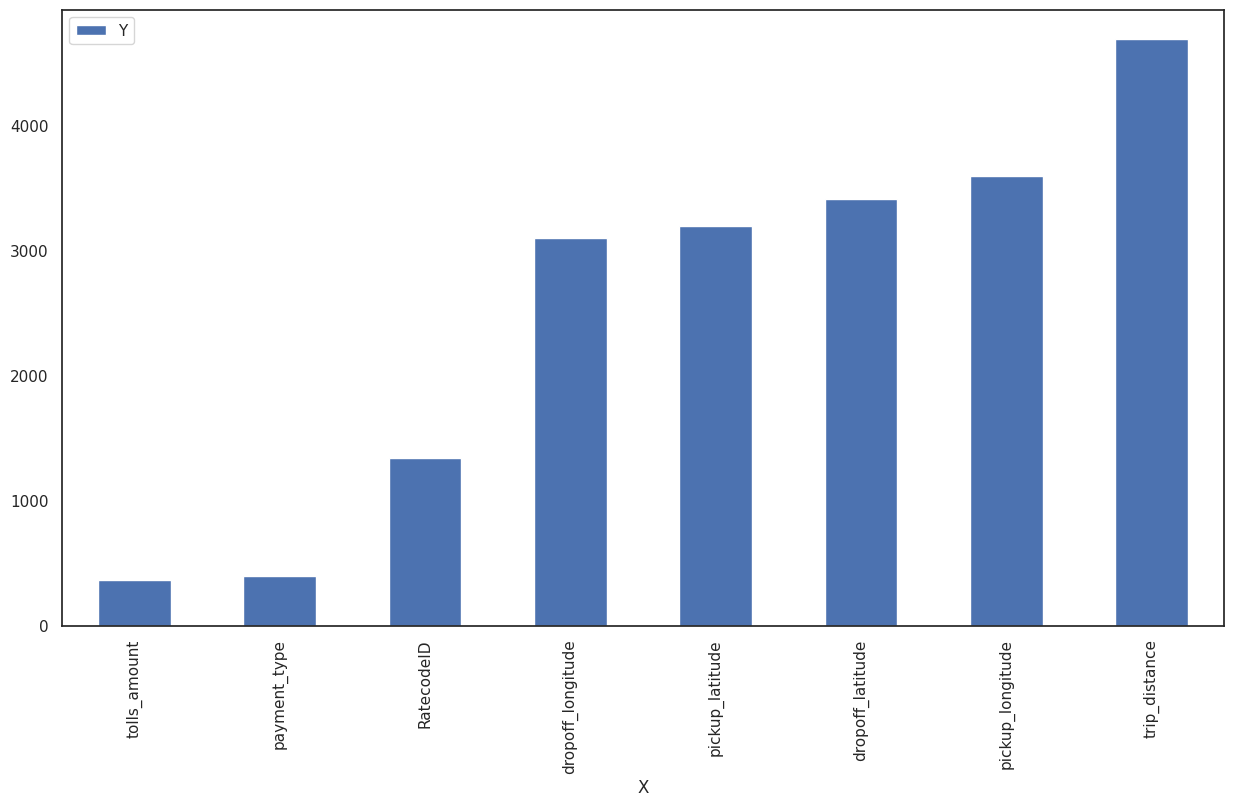

In [ ]:
fscores = pd.DataFrame({'X': list(model.get_fscore().keys()), 'Y': list(model.get_fscore().values())})
fscores.sort_values(by='Y').plot.bar(x='X')

- We can observe that **XGBoost** is finding features like `tip amount`, `trip distance` more useful to find the target variable.

### Feature Importance – Linear Regression

In [ ]:
print(list(zip( linear.coef_, X.columns)))

[(2.5813840394339436, 'trip_distance'), (-11.540014335246326, 'pickup_longitude'), (14.751019273660033, 'pickup_latitude'), (8.010559309792795, 'RatecodeID'), (0.1871289531193247, 'dropoff_longitude'), (-7.697453141736525, 'dropoff_latitude'), (-0.1865174853481611, 'payment_type'), (-0.02100718242513544, 'tolls_amount'), (0.0, 'month'), (0.0, 'year')]


- We can observe that linear regression assigning high negative coefficients to features like `pickup_longitude`, `dropoff_latitude`, `tools_amount`.

# Model Evaluation

**Define a function to evaluate the model.**

In [ ]:
def model_train_evaluation(y, ypred, model_name):

    # Model Evaluation metrics
    from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score, r2_score, mean_absolute_percentage_error
    print("\n \n Model Evaluation Report: ")
    print('Mean Absolute Error(MAE) of', model_name,':', mean_absolute_error(y, ypred))
    print('Mean Squared Error(MSE) of', model_name,':', mean_squared_error(y, ypred))
    print('Root Mean Squared Error (RMSE) of', model_name,':', mean_squared_error(y, ypred, squared = False))
    print('Mean absolute percentage error (MAPE) of', model_name,':', mean_absolute_percentage_error(y, ypred))
    print('Explained Variance Score (EVS) of', model_name,':', explained_variance_score(y, ypred))
    print('R2 of', model_name,':', (r2_score(y, ypred)).round(2))
    print('\n \n')

    # Actual vs Predicted Plot
    f, ax = plt.subplots(figsize=(12,6),dpi=100);
    plt.scatter(y, ypred, label="Actual vs Predicted")
    # Perfect predictions
    plt.xlabel('Fare amount')
    plt.ylabel('Fare amount')
    plt.title('Expection vs Prediction')
    plt.plot(y,y,'r', label="Perfect Expected Prediction")
    plt.legend()
    f.text(0.95, 0.06, 'AUTHOR: RINI CHRISTY',
         fontsize=12, color='green',
         ha='left', va='bottom', alpha=0.5);
    plt.show()

### Model Evaluation 1: Linear Regression


 
 Model Evaluation Report: 
Mean Absolute Error(MAE) of Linear regression Model : 1.7337873093578182
Mean Squared Error(MSE) of Linear regression Model : 11.32946658510252
Root Mean Squared Error (RMSE) of Linear regression Model : 3.365927299438079
Mean absolute percentage error (MAPE) of Linear regression Model : 0.17550167701384914
Explained Variance Score (EVS) of Linear regression Model : 0.9015549115291621
R2 of Linear regression Model : 0.9

 



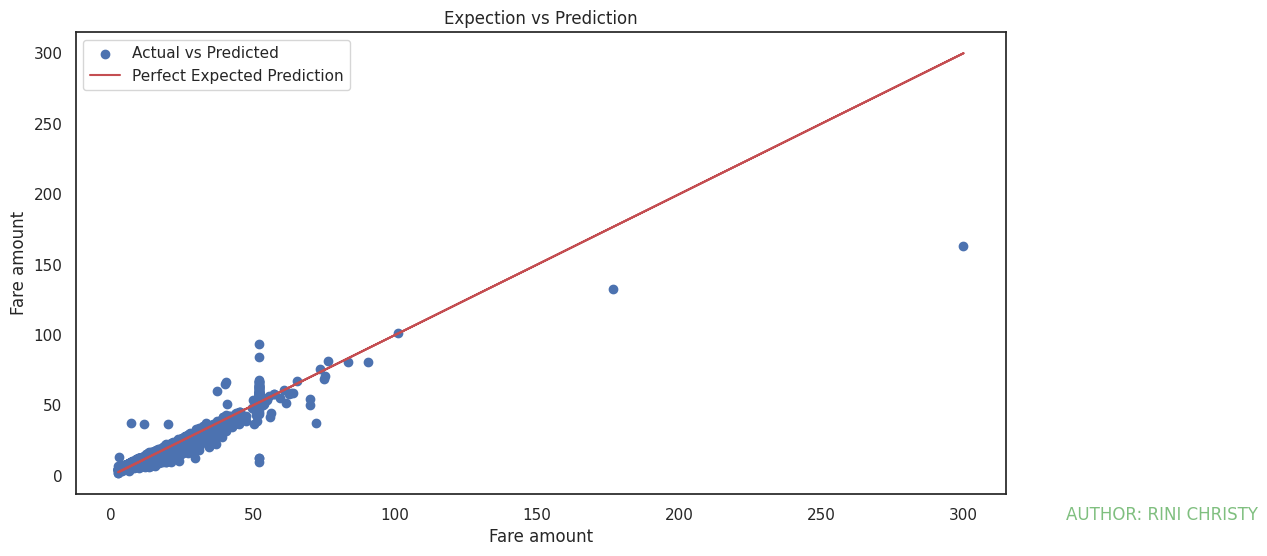

In [ ]:
lr = LinearRegression()
lr.fit (X_train, y_train)
Yhat_lr = lr.predict(X_test)
model_train_evaluation(y_test, Yhat_lr, 'Linear regression Model')

### Model Evaluation 2: Decision Tree


 
 Model Evaluation Report: 
Mean Absolute Error(MAE) of Decision Tree regression Model : 1.8445556946182728
Mean Squared Error(MSE) of Decision Tree regression Model : 14.137221526908634
Root Mean Squared Error (RMSE) of Decision Tree regression Model : 3.7599496707946285
Mean absolute percentage error (MAPE) of Decision Tree regression Model : 0.1689490709919457
Explained Variance Score (EVS) of Decision Tree regression Model : 0.8771907508243724
R2 of Decision Tree regression Model : 0.88

 



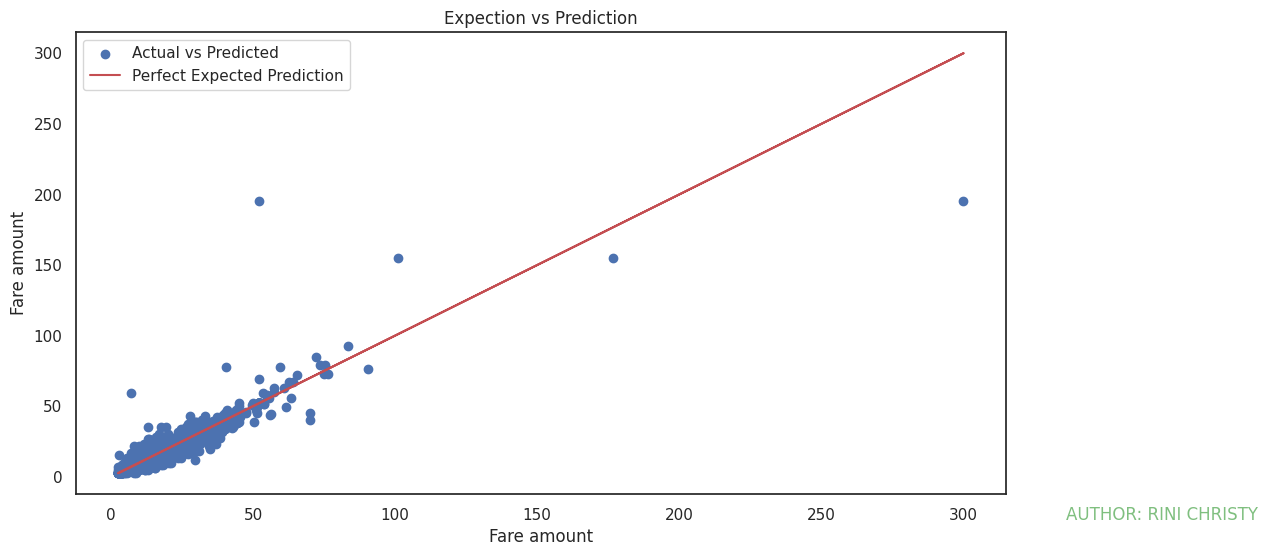

In [ ]:
dtr = DecisionTreeRegressor()
dtr.fit (X_train, y_train)
Yhat_dtr = dtr.predict(X_test)
model_train_evaluation(y_test, Yhat_dtr, 'Decision Tree regression Model')

#### Model Evaluation 3: XGBoost


 
 Model Evaluation Report: 
Mean Absolute Error(MAE) of Gradient Boosting Regression Model : 1.3845426691081903
Mean Squared Error(MSE) of Gradient Boosting Regression Model : 7.629890696214872
Root Mean Squared Error (RMSE) of Gradient Boosting Regression Model : 2.7622256780022285
Mean absolute percentage error (MAPE) of Gradient Boosting Regression Model : 0.12696106843330526
Explained Variance Score (EVS) of Gradient Boosting Regression Model : 0.9337034539233127
R2 of Gradient Boosting Regression Model : 0.93

 



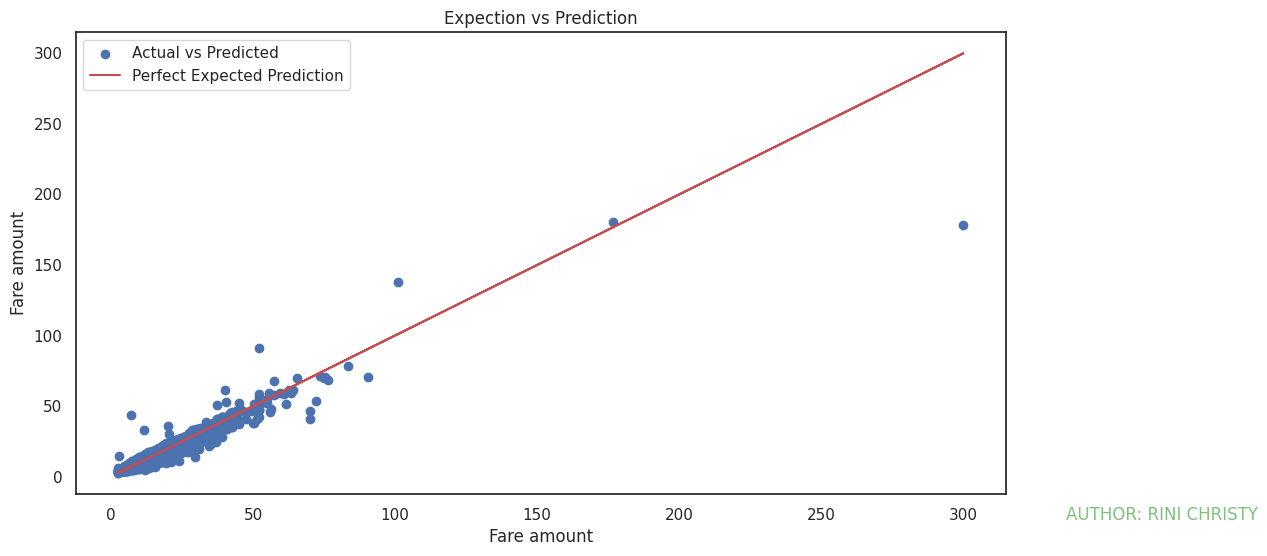

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
GB = GradientBoostingRegressor()
GB.fit (X_train, y_train)
Yhat_GB = GB.predict(X_test)
model_train_evaluation(y_test, Yhat_GB, 'Gradient Boosting Regression Model')

### Model Performance Comparison

| **Model Name**                | **RMSE**                | **R ^2**                       | **MAPE**                                                                                                                                                                          
| ------------------------------| -----------------| --------------------------------| --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
|Linear Regression              | 3.366                    | 0.90                           |0.123                                       |
        |
| Decision Tree                 | 3.639                      | 0.88                           |0.168                                   |  
      |
| XGBoost                       | 2.760                      | 0.93	                          | 0.175     

# Conclusion

As demonstrated through the EDA and further feature correlation analysis, we have reached an impressive correlation between the generated features. This is due to good data cleaning and confirmation of the hypothesis. However, we could have removed more outliers. And the models, on the training set, have reached a relatively good RMSE. For further approaches, some analysis taking into consideration a variation on the feature selection, such as selecting higher correlated features, is recommended. It will not help much but could save time from the model for taking not relevant decisions.

We have chosen three famous models due to their good performance with previous tabular data. The difference between them is not much, but We can clearly observe that a relatively more complex model like **XGBoost** is outperforming like **Linear Regression** and **Decision Trees**. This means that the features in the training data do not have a linear relationship with the target variable. Therefore, XGBoost was a good choice for modeling this dataset.

# References <a id ="references"></a>

1. TLC Trip Record Data, https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page, accessed on 25.01.2023
2. Poongodi, M., Malviya, M., Kumar, C., Hamdi, M., Vijayakumar, V., Nebhen, J. and Alyamani, H., 2022. New York City taxi trip duration prediction using MLP and XGBoost. International Journal of System Assurance Engineering and Management, pp.1-12.
3. NYC Taxi Fare Prediction, https://www.kaggle.com/code/rinichristy/new-york-city-taxi-fare-prediction, accessed on 28.01.2023
4. Latitude and longitude coordinates of Newyork City, https://www.latlong.net/place/new-york-city-ny-usa-1848.html, accessed on 26.01.2023
5. Simon Brugman. 2019. pandas-profiling: Exploratory Data Analysis for Python. https://github.com/pandas- profiling/pandas- profiling.
6. Exploratory Data Analysis, https://www.analyticsvidhya.com/blog/2021/06/exploratory-data-analysis-using-data-visualization-techniques/, accessed on 26.01.2023
7. feature-engineering-on-date-time, https://towardsdatascience.com/feature-engineering-on-date-time-data-90f6e954e6b8, accessed on 27.01.2023
8. Shubham, Decision Tree Tutorial, https://www.hackerearth.com/practice/machine-learning/machine-learning-algorithms/ml-decision-tree/tutorial/, accessed on 27.01.2023
9. Manav, Decision Trees: Explained in Simple Steps, https://medium.com/analytics-vidhya/decision-trees-explained-in-simple-steps-39ee1a6b00a2, accessed on 27.01.2023
10. Poongodi, M., Malviya, M., Kumar, C., Hamdi, M., Vijayakumar, V., Nebhen, J. and Alyamani, H., 2022. New York City taxi trip duration prediction using MLP and XGBoost. International Journal of System Assurance Engineering and Management, pp.1-12.
11. NYC Taxi Fare Prediction, https://www.kaggle.com/code/arthurdimitri/nyc-taxi-fare-prediction-dimitri/notebook, accessed on 27.01.2023
12. NYC Taxi Fare Prediction, https://www.kaggle.com/code/rinichristy/new-york-city-taxi-fare-prediction, accessed on 28.01.2023
13. linear-regression-decision-tree-and-ensemble-learning, https://medium.com/analytics-vidhya/linear-regression-decision-tree-and-ensemble-learning-applied-to-seoul-housing-prices-830d3493cfdb, accessed on 28.01.2023